In [2]:
## Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display all codes in a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##Display all dataframe column names and results.
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [3]:
## Read in the Dataset and have an overall glimpse at the data
df = pd.read_csv("./2022-07-25-21-04-14-EDT-search-csv-export.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Account                                                  10154 non-null  object 
 1   User Name                                                10167 non-null  object 
 2   Followers at Posting                                     4129 non-null   float64
 3   Post Created                                             10167 non-null  object 
 4   Post Created Date                                        10167 non-null  object 
 5   Post Created Time                                        10167 non-null  object 
 6   Type                                                     10167 non-null  object 
 7   Total Interactions                                       10167 non-null  object 
 8   Likes                     

As we can see from the above, there are few columns within the dataset that we can get rid of. They are either duplicated from another column or they are a completely empty column.

In [4]:
## Dropping unuseful columns and creating a new column ID that can be used later on to index
df1 = df.drop(columns =['Title', 'Link','Total Interactions (weighted  —  Likes 1x Comments 1x )'])
df1['id'] = df1.index
first_column = df1.pop('id')
df1.insert(0,'id', first_column)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             10167 non-null  int64  
 1   Account                        10154 non-null  object 
 2   User Name                      10167 non-null  object 
 3   Followers at Posting           4129 non-null   float64
 4   Post Created                   10167 non-null  object 
 5   Post Created Date              10167 non-null  object 
 6   Post Created Time              10167 non-null  object 
 7   Type                           10167 non-null  object 
 8   Total Interactions             10167 non-null  object 
 9   Likes                          10167 non-null  int64  
 10  Comments                       10167 non-null  int64  
 11  Views                          10167 non-null  int64  
 12  Like and View Counts Disabled  10167 non-null 

id                 Account             User Name  Followers at Posting             Post Created Post Created Date Post Created Time   Type Total Interactions  Likes  Comments  Views  Like and View Counts Disabled                                       URL                                                                                                                                                                                                                                                                                 Photo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description                                                                                                                   Image Text  Sponsor Id Sponsor Name Overperforming Score
0   0        Genelia Deshmukh              geneliad             7291844.0  2021-10-16 05:22:21 EDT        2021-10-16          05:22:21  Album             49 779  49634       145      0                          False  https://www.instagram.com/p/CVFZVlsogvO/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/246276386_246951120783485_3238136309611538599_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=OnNeGx8TluQAX9UBzao&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9usnNIWXLUn-EHWuNd7z1LzLTyIMDnp3FRQv_TAmb1fg&oe=62E48BAF                                                                                                                                                                                                                                                                                              #worldfoodday2021 \n\n We need to make our food - our investment into our health, our being and all the other beings that exist and most importantly our planet 💚\n\nLet’s change our planet - One bite at a time..\n\nWww.imaginemeats.com\n\n•\n#ImagineMeats #ImagineChicken #ImagineMutton #Plantbased #Plantbasedmeat #Plantlover #Happymeat #Meatfree #Meatlesseveryday #alternativeprotein #Meatlessmeat #Crueltyfree #worldfoodday2021                                                                                                                          NaN         NaN          NaN                -6.16
1   1           The N kitchen       blend.of.spices                   NaN  2022-01-05 11:13:43 EST        2022-01-05          11:13:43  Album             46 189  46025       164      0                          False  https://www.instagram.com/p/CYWszc_PzsB/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/271304997_228085712837104_2842214994172471325_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=qrjgj-0YJ64AX81LGaA&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9ZaF0DwmVaaKX54JYylFWwTebxIRkUR3PJ9z5Bnyx8uw&oe=62E44E12  Swipe left to Choose your favorite chole combo ➡️➡️ \n. \n1. Chole Bhature 🍱🍱\n. \n2. Chole Samosa🧆🧆\n. \n3. Chole Paratha🥙🥙\n. \n4. Chole Kulcha🥘🥘\n. \n5. Chole Chawal🍛🍛\n. \n6. Chole Kachori🍲🍲\n. \n7. Chole Naan🌮🌮\n. \n8. Chole Tikki🍝🍝\n. \n9. Chole Poori🍜🍜\n\nComment down your favourite combo and for more such updates follow @blend.of.spices @blend.of.spices \n@blend.of.spices @blend.of.spices \n\n#choleplatter #cholecombo #cholebhature #cholechawal #cholepoori #kulcha #tikki #samose #kachori #naan #paratha #delhigram #delhieats #delhifood #foodiesofinstagram #foodcontest #foodcompetition #comment #foodgasm #f

Account column represents the name for the account and Username is the ID asssociated with the account, in our dataset, there are a few account name missing and this wouldn't affect our analysis.

Followers at Posting lacks more than half of the datapoints.

There are 10167 records of posts since each User Name is associated with one individual post, therefore by counting the User Name we can get a result of how many posts there are.

As for the number of users, since User Name is a unique ID for each user, we can just see how many distinct User Name there are. Here's the result:

In [5]:
##Calculating Number of Users
num = df1['User Name'].value_counts()
print("No. of Users:" + str(len(num)))

No. of Users:2237


There are 2237 unique users.

In [6]:
## Distribution of the hashtags (barplot or similar)
## In order to achieve such things we must seperate the hashtags out from the Description column

## Creating a function in order to pickout the hashtag words.
def extract_hashtags(text):
    list1 = []

    for word in text.split():
        if word[0] == '#':  
            list1.append(word[1:])
    
    remove_duplicate_list = list(set(list1))
    
    return remove_duplicate_list

## Inputing the list from the Description column, creating a function that will have a nested list
def hashtags_list(list_input):
    hashtag_list = []
    for i in list_input:
        z = extract_hashtags(str(i))
        hashtag_list.append(z) 
    
    return hashtag_list

s = df1['Description'].tolist()
#loading in the Description column
h_list = hashtags_list(s)
#lower case everything to make content case insensitive
h_list = [[string.lower() for string in sublist] for sublist in h_list]

## Function to create a list that only contains hashtag words from the given template
def keep_key_hashtag(list1):
    f_list = []
    keyword_list = ['edibleinsects', 'alternativeprotein', 'futurefood', 'futurefoods', 'ediblebugs','meatlessprotein', 'cultivatedmeat', 'culturedmeat', 'labgrownmeat', 'foodunfolded', 'cleanmeat']
    for sublist in list1:
        sub_filtered_list = []
        for item in sublist:
            if item in keyword_list:
                sub_filtered_list.append(item)
        f_list.append(sub_filtered_list)
    
    return f_list


In [7]:
## Creating a dataframe that includes all hashtags in the Hashtag column
all_hashtag_df = pd.DataFrame(np.array(h_list, dtype=object), columns = ['Hashtag'])
all_hashtag_df['id'] = all_hashtag_df.index
first_column = all_hashtag_df.pop('id')
all_hashtag_df.insert(0,'id', first_column)

df_merged = pd.merge(df1, all_hashtag_df, how = "left", on ='id')
df_merged['HASHTAG'] = df_merged.Hashtag.apply(', '.join)
df_merged.drop('Hashtag',axis=1, inplace=True)
df_merged.head()


id                 Account             User Name  Followers at Posting             Post Created Post Created Date Post Created Time   Type Total Interactions  Likes  Comments  Views  Like and View Counts Disabled                                       URL                                                                                                                                                                                                                                                                                 Photo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description                                                                                                                   Image Text  Sponsor Id Sponsor Name Overperforming Score                                                                                                                                                                                                                                                                                                                HASHTAG
0   0        Genelia Deshmukh              geneliad             7291844.0  2021-10-16 05:22:21 EDT        2021-10-16          05:22:21  Album             49 779  49634       145      0                          False  https://www.instagram.com/p/CVFZVlsogvO/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/246276386_246951120783485_3238136309611538599_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=OnNeGx8TluQAX9UBzao&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9usnNIWXLUn-EHWuNd7z1LzLTyIMDnp3FRQv_TAmb1fg&oe=62E48BAF                                                                                                                                                                                                                                                                                              #worldfoodday2021 \n\n We need to make our food - our investment into our health, our being and all the other beings that exist and most importantly our planet 💚\n\nLet’s change our planet - One bite at a time..\n\nWww.imaginemeats.com\n\n•\n#ImagineMeats #ImagineChicken #ImagineMutton #Plantbased #Plantbasedmeat #Plantlover #Happymeat #Meatfree #Meatlesseveryday #alternativeprotein #Meatlessmeat #Crueltyfree #worldfoodday2021                                                                                                                          NaN         NaN          NaN                -6.16                                                                                                                            crueltyfree, happymeat, plantbased, meatlesseveryday, imaginemeats, alternativeprotein, plantlover, worldfoodday2021, plantbasedmeat, meatlessmeat, imaginechicken, meatfree, imaginemutton
1   1           The N kitchen       blend.of.spices                   NaN  2022-01-05 11:13:43 EST        2022-01-05          11:13:43  Album             46 189  46025       164      0                          False  https://www.instagram.com/p/CYWszc_PzsB/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/271304997_228085712837104_2842214994172471325_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=qrjgj-0YJ64AX81LGaA&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9ZaF0DwmVaaKX54JYylFWwTebxIRkUR3PJ9z5Bnyx8uw&oe=62E44E12

In [8]:
## Creating a list that only includes the hashtag words from the given template

f_list = keep_key_hashtag(h_list)
hashtag_df = pd.DataFrame(np.array(f_list, dtype=object), columns =['Hashtag'])
hashtag_df['id'] = hashtag_df.index
first_column = hashtag_df.pop('id')
hashtag_df.insert(0,'id', first_column)

df3 = pd.merge(df1,hashtag_df,how = "left", on='id')

##df3['Hashtag'].str.replace('\[|\]|', '')
df3['HASHTAG'] = df3.Hashtag.apply(', '.join)
df3.drop('Hashtag',axis=1, inplace=True)
df3.head()
        

id                 Account             User Name  Followers at Posting             Post Created Post Created Date Post Created Time   Type Total Interactions  Likes  Comments  Views  Like and View Counts Disabled                                       URL                                                                                                                                                                                                                                                                                 Photo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description                                                                                                                   Image Text  Sponsor Id Sponsor Name Overperforming Score             HASHTAG
0   0        Genelia Deshmukh              geneliad             7291844.0  2021-10-16 05:22:21 EDT        2021-10-16          05:22:21  Album             49 779  49634       145      0                          False  https://www.instagram.com/p/CVFZVlsogvO/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/246276386_246951120783485_3238136309611538599_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=OnNeGx8TluQAX9UBzao&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9usnNIWXLUn-EHWuNd7z1LzLTyIMDnp3FRQv_TAmb1fg&oe=62E48BAF                                                                                                                                                                                                                                                                                              #worldfoodday2021 \n\n We need to make our food - our investment into our health, our being and all the other beings that exist and most importantly our planet 💚\n\nLet’s change our planet - One bite at a time..\n\nWww.imaginemeats.com\n\n•\n#ImagineMeats #ImagineChicken #ImagineMutton #Plantbased #Plantbasedmeat #Plantlover #Happymeat #Meatfree #Meatlesseveryday #alternativeprotein #Meatlessmeat #Crueltyfree #worldfoodday2021                                                                                                                          NaN         NaN          NaN                -6.16  alternativeprotein
1   1           The N kitchen       blend.of.spices                   NaN  2022-01-05 11:13:43 EST        2022-01-05          11:13:43  Album             46 189  46025       164      0                          False  https://www.instagram.com/p/CYWszc_PzsB/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/271304997_228085712837104_2842214994172471325_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=qrjgj-0YJ64AX81LGaA&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9ZaF0DwmVaaKX54JYylFWwTebxIRkUR3PJ9z5Bnyx8uw&oe=62E44E12  Swipe left to Choose your favorite chole combo ➡️➡️ \n. \n1. Chole Bhature 🍱🍱\n. \n2. Chole Samosa🧆🧆\n. \n3. Chole Paratha🥙🥙\n. \n4. Chole Kulcha🥘🥘\n. \n5. Chole Chawal🍛🍛\n. \n6. Chole Kachori🍲🍲\n. \n7. Chole Naan🌮🌮\n. \n8. Chole Tikki🍝🍝\n. \n9. Chole Poori🍜🍜\n\nComment down your favourite combo and for more such updates follow @blend.of.spices @blend.of.spices \n@blend.of.spices @blend.of.spices \n\n#choleplatter #cholecombo #cholebhature #cholechawal #cholepoori #kulcha #tikki #samose #kachori #naan #paratha #delhigram #delhieats #delhifood #foodiesofinstagram #foodcontes

<AxesSubplot:xlabel='Hashtags', ylabel='Count'>

Text(0.5, 1.0, 'Count of Hashtags')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Count')

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'edibleinsects'),
  Text(2, 0, 'cleanmeat'),
  Text(3, 0, 'alternativeprotein'),
  Text(4, 0, 'ediblebugs'),
  Text(5, 0, 'foodunfolded'),
  Text(6, 0, 'culturedmeat'),
  Text(7, 0, 'labgrownmeat'),
  Text(8, 0, 'futurefoods'),
  Text(9, 0, 'cultivatedmeat'),
  Text(10, 0, 'meatlessprotein')])

Text(0.0, 4747.3, '4747')

Text(0.0, 4867.0, '46.7%')

Text(1.0, 2389.3, '2389')

Text(1.0, 2509.0, '23.5%')

Text(2.0, 1329.3, '1329')

Text(2.0, 1449.0, '13.1%')

Text(3.0, 669.3, '669')

Text(3.0, 789.0, '6.6%')

Text(4.0, 482.3, '482')

Text(4.0, 602.0, '4.7%')

Text(5.0, 372.3, '372')

Text(5.0, 492.0, '3.7%')

Text(6.0, 324.3, '324')

Text(6.0, 444.0, '3.2%')

Text(7.0, 271.3, '271')

Text(7.0, 391.0, '2.7%')

Text(8.0, 191.3, '191')

Text(8.0, 311.0, '1.9%')

Text(9.0, 108.3, '108')

Text(9.0, 228.0, '1.1%')

Text(10.0, 65.3, '65')

Text(10.0, 185.0, '0.6%')

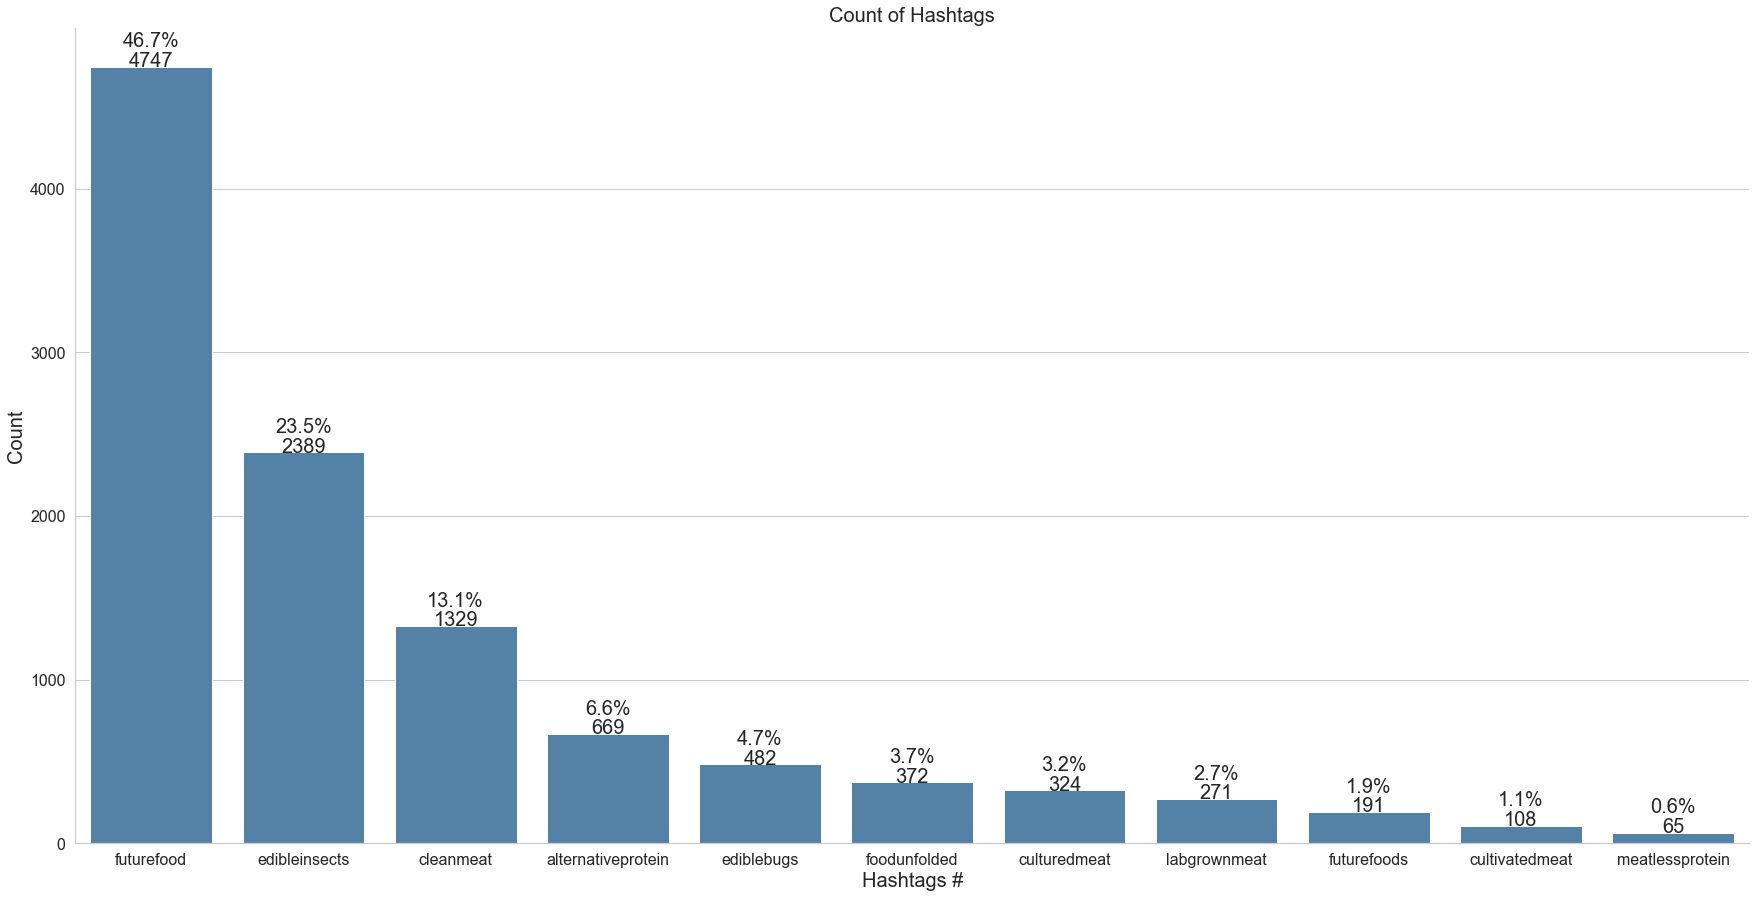

In [9]:
## Ploting the 10 specific Hashtag taht was originally requested, showing the count of each Hashtag

## Manipulating the dataset to get the dataframe that we can use to plot
tag_pool = [i for tags in f_list for i in tags if i != '']
s = pd.value_counts(tag_pool)
s2 = pd.value_counts(tag_pool)/len(df3)*100
s_df = s.to_frame()
s_df = s_df.assign(Percentage = s2)
s_df = s_df.reset_index()
s_df = s_df.rename(columns= {'index':'Hashtags', 0:'Count'})

## Plotting using seaborn
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(30, 15))
sns.despine(f)
sns.barplot(x='Hashtags', y='Count', data=s_df, color="steelblue")
plt.title('Count of Hashtags',fontsize= 20)
plt.xlabel('Hashtags #',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Putting labels of count and percentage on top of each bar in the graph
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.3
   z = patches[i].get_height()+120
   ax.annotate('{:}'.format(s_df['Count'][i]), (x, y), ha='center',fontsize= 20)
   ax.annotate('{:.1f}%'.format(s_df['Percentage'][i]), (x, z), ha='center',fontsize= 20)
plt.show()

['crueltyfree',
 'happymeat',
 'plantbased',
 'meatlesseveryday',
 'imaginemeats',
 'alternativeprotein',
 'plantlover',
 'worldfoodday2021',
 'plantbasedmeat',
 'meatlessmeat',
 'imaginechicken',
 'meatfree',
 'imaginemutton',
 'cholepoori',
 'punjabifood',
 'comment',
 'indianfoodblogger',
 'noidaeats',
 'delhigram',
 'cholecombo',
 'amritsari',
 'foodunfolded',
 'cholechawal',
 'choleplatter',
 'tikki',
 'samose',
 'cholebhature',
 'foodgasm',
 'calcuttafoodie',
 'foodcontest',
 'kulcha',
 'delhifood',
 'paratha',
 'naan',
 'foodblogger',
 'foodiesofinstagram',
 'kachori',
 'foodcompetition',
 'delhieats',
 'healthyeating',
 'movingmountains',
 'sustainablefood',
 'plantpower',
 'plantbasedfood',
 'veganbeef',
 'veganmeat',
 'meatmadefromplants',
 'veganchef',
 'futurefood',
 'plantbased',
 'plantbasedbeef',
 'outrageouslymeaty',
 'whatveganseat',
 'vegannews',
 'vegancommunity',
 'healthyeating',
 'vegan',
 'vegetarian',
 'plantbased',
 'plantprotein',
 'healthylifestyle',
 'health

<AxesSubplot:xlabel='Hashtags', ylabel='Count'>

Text(0.5, 1.0, 'Count of Most Appeared Hashtags in the Dataset')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Count')

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'edibleinsects'),
  Text(2, 0, 'cleanmeat'),
  Text(3, 0, 'sustainability'),
  Text(4, 0, 'food'),
  Text(5, 0, 'plantbased'),
  Text(6, 0, 'sustainable'),
  Text(7, 0, 'sustainablefood'),
  Text(8, 0, 'vegan'),
  Text(9, 0, 'protein'),
  Text(10, 0, 'sustainableliving'),
  Text(11, 0, 'foodie'),
  Text(12, 0, 'alternativeprotein'),
  Text(13, 0, 'healthyfood'),
  Text(14, 0, 'insectprotein'),
  Text(15, 0, 'entomophagy'),
  Text(16, 0, 'vegetarian'),
  Text(17, 0, 'eatinsects'),
  Text(18, 0, 'cleaneating'),
  Text(19, 0, 'insects')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'edibleinsects'),
  Text(2, 0, 'cleanmeat'),
  Text(3, 0, 'sustainability'),
  Text(4, 0, 'food'),
  Text(5, 0, 'plantbased'),
  Text(6, 0, 'sustainable'),
  Text(7, 0, 'sustainablefood'),
  Text(8, 0, 'vegan'),
  Text(9, 0, 'protein'),
  Text(10, 0, 'sustainableliving'),
  Text(11, 0, 'foodie'),
  Text(12, 0, 'alternativeprotein'),
  Text(13, 0, 'healthyfood'),
  Text(14, 0, 'insectprotein'),
  Text(15, 0, 'entomophagy'),
  Text(16, 0, 'vegetarian'),
  Text(17, 0, 'eatinsects'),
  Text(18, 0, 'cleaneating'),
  Text(19, 0, 'insects')])

Text(0.0, 4747.3, '4747')

Text(0.0, 4867.0, '46.7%')

Text(1.0, 2389.3, '2389')

Text(1.0, 2509.0, '23.5%')

Text(2.0, 1329.3, '1329')

Text(2.0, 1449.0, '13.1%')

Text(3.0, 1223.3, '1223')

Text(3.0, 1343.0, '12.0%')

Text(4.0, 1079.3, '1079')

Text(4.0, 1199.0, '10.6%')

Text(5.0, 989.3, '989')

Text(5.0, 1109.0, '9.7%')

Text(6.0, 973.3, '973')

Text(6.0, 1093.0, '9.6%')

Text(7.0, 807.3, '807')

Text(7.0, 927.0, '7.9%')

Text(8.0, 807.3, '807')

Text(8.0, 927.0, '7.9%')

Text(9.0, 734.3, '734')

Text(9.0, 854.0, '7.2%')

Text(10.0, 719.3, '719')

Text(10.0, 839.0, '7.1%')

Text(11.0, 710.3, '710')

Text(11.0, 830.0, '7.0%')

Text(12.0, 669.3, '669')

Text(12.0, 789.0, '6.6%')

Text(13.0, 659.3, '659')

Text(13.0, 779.0, '6.5%')

Text(14.0, 596.3, '596')

Text(14.0, 716.0, '5.9%')

Text(15.0, 569.3, '569')

Text(15.0, 689.0, '5.6%')

Text(16.0, 564.3, '564')

Text(16.0, 684.0, '5.5%')

Text(17.0, 563.3, '563')

Text(17.0, 683.0, '5.5%')

Text(18.0, 542.3, '542')

Text(18.0, 662.0, '5.3%')

Text(19.0, 512.3, '512')

Text(19.0, 632.0, '5.0%')

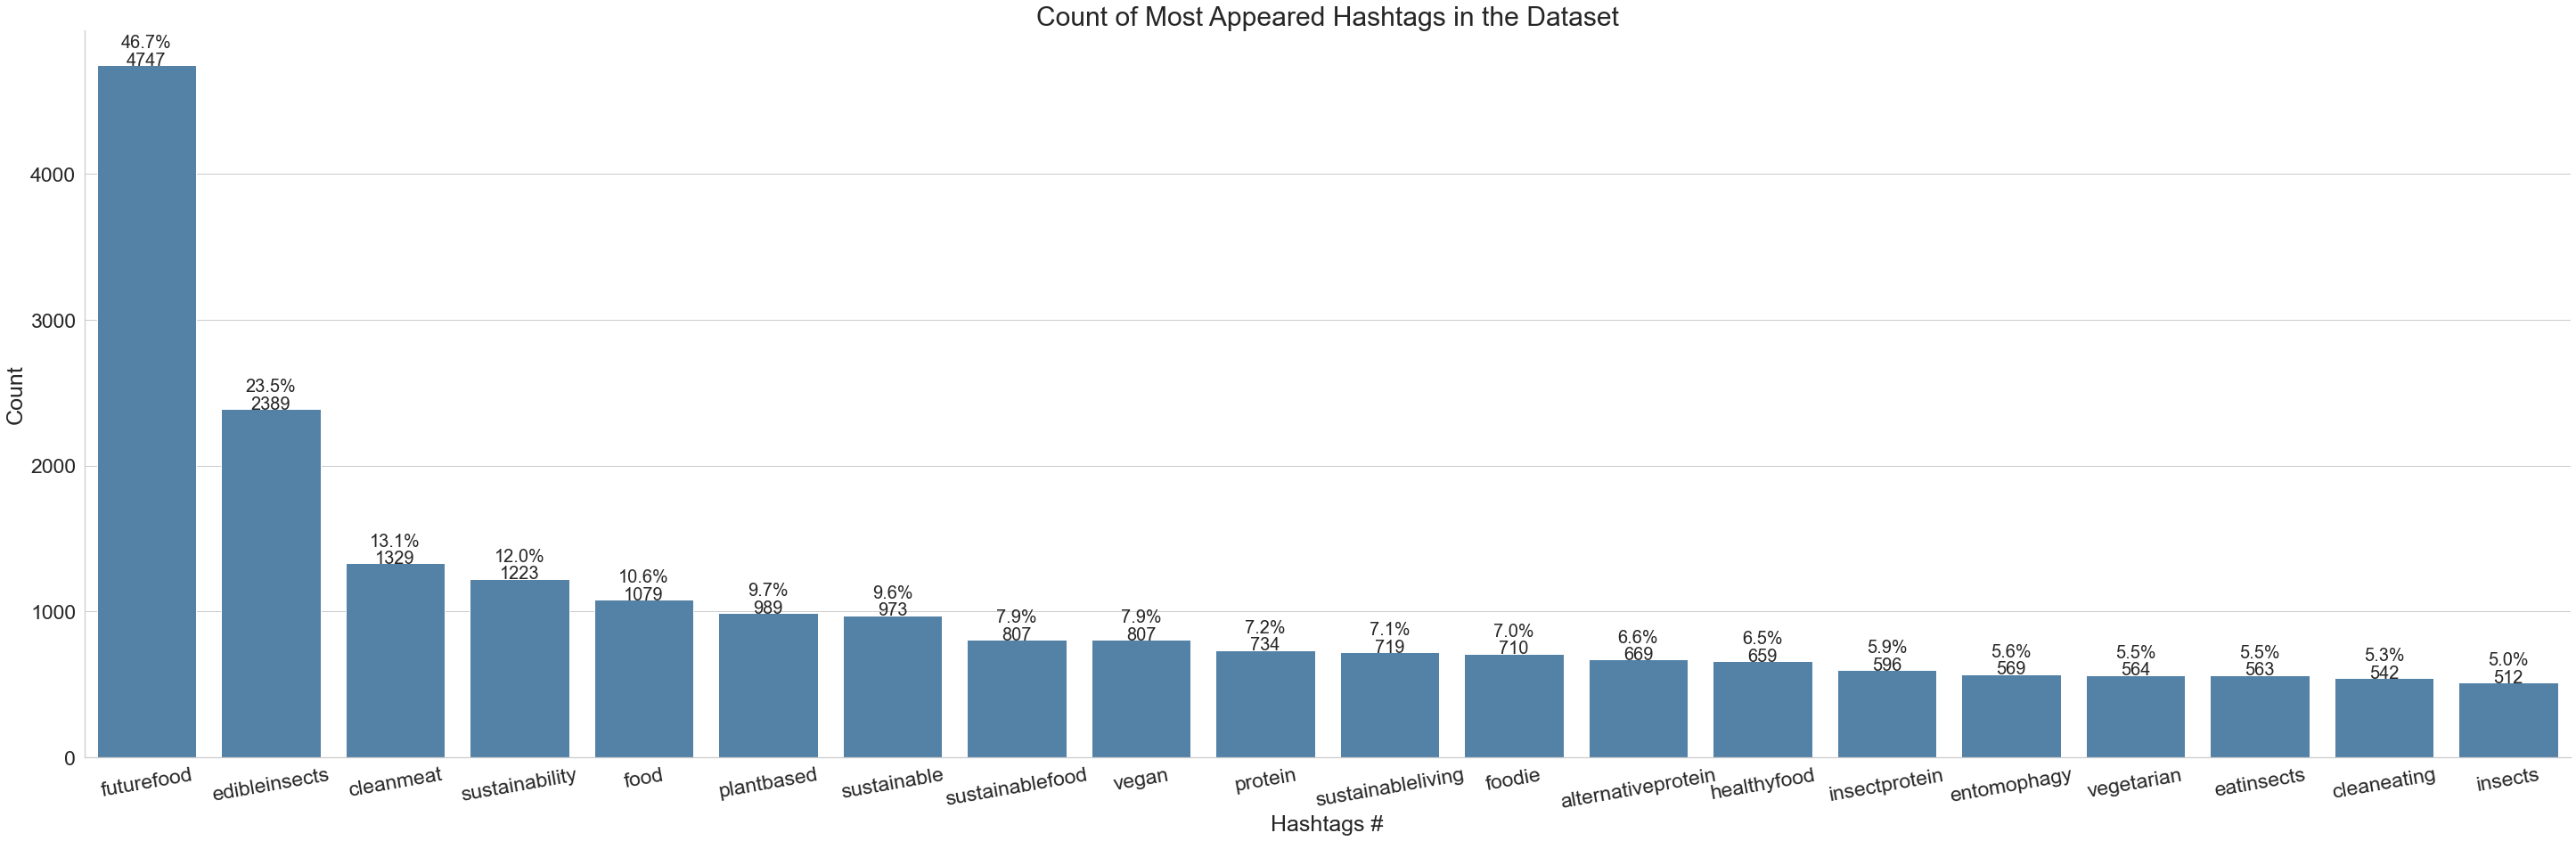

In [21]:
## Plotting the most appeared 20 Hashtags to see the count of each hashtags

## Manipulating the dataset to get the dataframe that we can use to plot
tag_pool_2 = [i for tags in h_list for i in tags if i != '']
tag_pool_2
s3 = pd.value_counts(tag_pool_2)
s4 = pd.value_counts(tag_pool_2)/len(df_merged)*100
ss_df = s3.to_frame()
ss_df = ss_df.assign(Percentage = s4)
ss_df = ss_df.reset_index()
ss_df = ss_df.rename(columns= {'index':'Hashtags', 0:'Count'})
ss_df_20 = ss_df.head(20)

## Plotting using seaborn
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(50, 15))
sns.despine(f)
sns.barplot(x= 'Hashtags', y='Count', data=ss_df_20, color="steelblue")
plt.title('Count of Most Appeared Hashtags in the Dataset',fontsize= 30)
plt.xlabel('Hashtags #',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.yticks(fontsize=23)
plt.xticks(fontsize=23)
plt.xticks(rotation=10)

## Putting labels of count and percentage on top of each bar in the graph
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.3
   z = patches[i].get_height()+120
   ax.annotate('{:}'.format(ss_df_20['Count'][i]), (x, y), ha='center',fontsize= 20)
   ax.annotate('{:.1f}%'.format(ss_df_20['Percentage'][i]), (x, z), ha='center',fontsize= 20)
plt.show()

count    cum_count
Post Created Date                       
2012-08-31         1.000000     1.500000
2013-02-28         1.000000     3.000000
2013-08-31         1.083333     4.333333
2014-02-28         1.038462     7.500000
2014-08-31         1.240741    24.129630
2015-02-28         1.075758    31.545455
2015-08-31         1.111888    54.440559
2016-02-29         1.225434    87.838150
2016-08-31         1.210256   142.148718
2017-02-28         1.200935   194.663551
2017-08-31         1.324232   281.040956
2018-02-28         1.371765   357.075294
2018-08-31         1.364198   458.635802
2019-02-28         1.379310   617.608519
2019-08-31         1.756388   758.671210
2020-02-29         1.765886   922.357860
2020-08-31         1.757634  1175.551527
2021-02-28         1.762309  1268.057725
2021-08-31         1.599018  1559.504092
2022-02-28         1.405745  1514.605027
2022-08-31         1.411290  1752.715054

Post Created Date        HASHTAG  count  cum_count
0        2012-08-17     futurefood      1          1
1        2012-08-21     futurefood      1          2
2        2012-09-10     futurefood      1          3
3        2013-05-03  edibleinsects      1          1
4        2013-05-08     futurefood      2          5

<AxesSubplot:xlabel='Post Created Date', ylabel='cum_count'>

(array([15340., 15706., 16071., 16436., 16801., 17167., 17532., 17897.,
        18262., 18628., 18993., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Timeline in Years')

Text(0, 0.5, 'Cumulative Sum of each Hashtag')

Text(0.5, 1.0, 'Cumulative counts of different hashtag words at a given time')

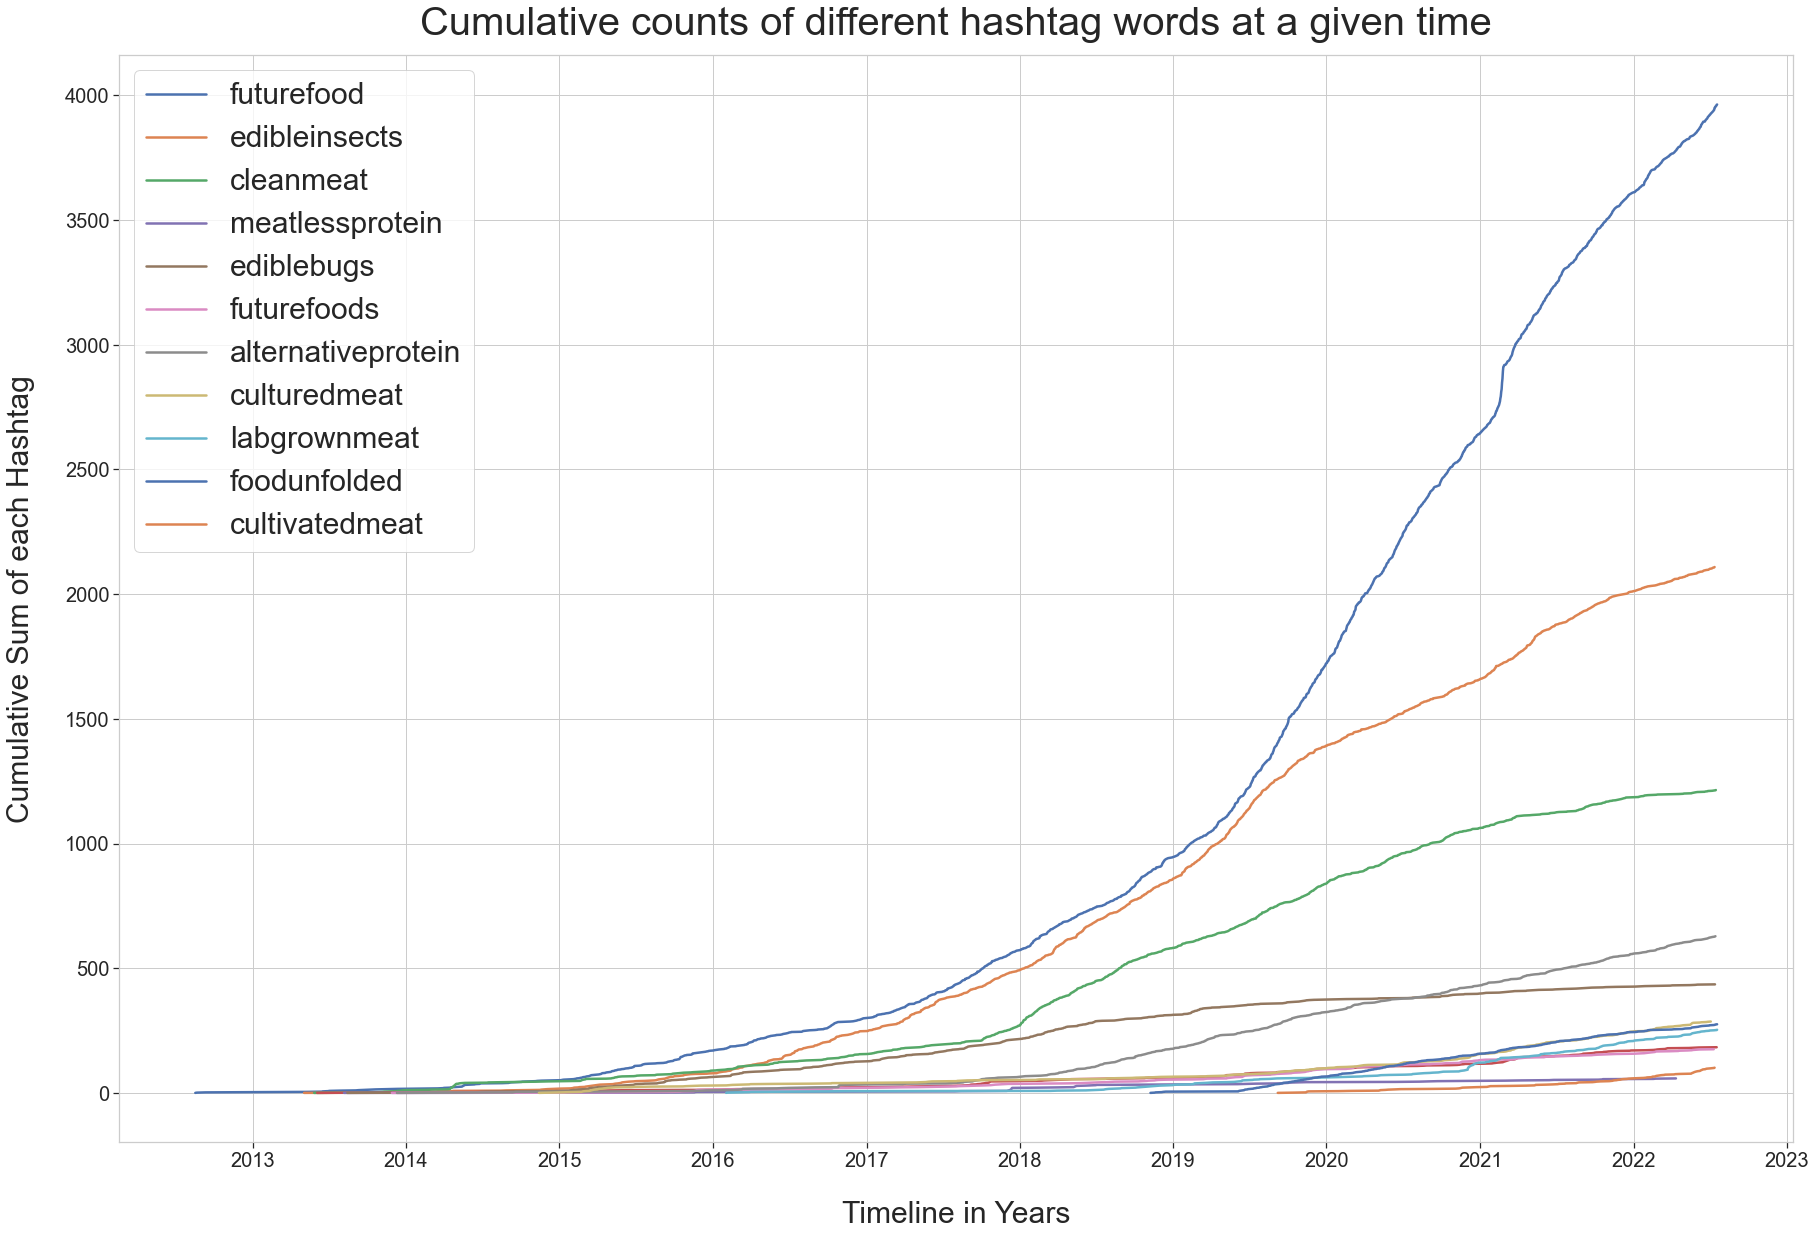

In [11]:
# df4 contains HASHTAG column, which includes the hashtag. 
# df4 also contains the Post Created Date column associated with the hashtag.
# find the cumulative count of different hashtag words at a given time and put them in a new dataframe.

## Creating new dataframe called df4
df4 = df3.groupby(['Post Created Date','HASHTAG']).size().reset_index(name='count')

# parse the cells in the Hashtag column to get the hashtag words
# If there are multiple hashtags, separate them by a comma
# Replicate the original row and create a new row for each hashtag word
for i in df4.index:
    # if there are more than one hashtag
    if df4.iloc[i,1].find(',') != -1:
        # split the hashtag into a list, delete the white spaces
        temp_list = df4.iloc[i,1].split(',')
        temp_list = [x.strip() for x in temp_list]
        # for each hashtag except the first one in temp_list, create a new row
        for j in range(0,len(temp_list)):
            # create a new row
            df4.loc[i+j] = df4.iloc[i,:]
            # change the hashtag word to the new hashtag word
            df4.iloc[i+j,1] = temp_list[j]

# find the cumulative count of each hashtag word over time
df4['cum_count'] = df4.groupby(['HASHTAG'])['count'].cumsum()

## Refactoring the Date since plotting all the specific date on to the graph takes way too long to load
df4.set_index('Post Created Date', inplace=True)
df4.index = pd.to_datetime(df4.index)
df4.resample('6M').mean()
# round the cum_count to 0 decimal places
df4['cum_count'] = df4['cum_count'].round(0)
df4.reset_index(inplace=True)
df4 = df4.rename(columns = {'index':'Post Created Date'})
df4.head()

## Plotting using seaborn
custom_params = {'xtick.bottom': True,'ytick.left': True}
sns.set_theme(style="whitegrid", rc=custom_params)
f, ax = plt.subplots(figsize=(30,20))
sns.set_context(font_scale=2,rc={"lines.linewidth": 2.5})
sns.lineplot(data=df4, x ='Post Created Date', y='cum_count', hue='HASHTAG', palette='deep', legend ="auto")
plt.legend(prop={'size':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel="Timeline in Years", fontsize=30, labelpad= 30)
plt.ylabel(ylabel="Cumulative Sum of each Hashtag",fontsize=30, labelpad=30)
ax.set_title("Cumulative counts of different hashtag words at a given time", fontsize=40, pad=20)

## A neat function to check the current parameters setup and we can adjust the parameters accordingly
# sns.axes_style()

##ax.legend(loc='upper left', handlelength=10, borderpad=4, labelspacing=3)
##plt.show()


## Unsuccessful attempt using pd.melt to smash wide dataframe into a long one

df4 = df3.sort_values('Post Created Date')
tag_unique = pd.unique(tag_pool)
for tag in tag_unique:
    df4[tag] = df4['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)
    df4[tag] = np.cumsum(df4[tag])

df_lineplot =df4[["Post Created Date","alternativeprotein","foodunfolded","futurefood","meatlessprotein","labgrownmeat","cultivatedmeat","cleanmeat","culturedmeat","edibleinsects","futurefoods","ediblebugs"]]
df_lineplot_melt = df_lineplot.melt(id_vars = ['Post Created Date'], value_name="cumsum")

df_lineplot_melt.set_index("Post Created Date", inplace=True)
df_lineplot_melt.index = pd.to_datetime(df_lineplot_melt.index)
df_lineplot_melt.resample('6M').mean()
# round the cum_count to 0 decimal places
df_lineplot_melt['cumsum'] = df_lineplot_melt['cumsum'].round(0)
df_lineplot_melt.reset_index(inplace=True)
df_lineplot_melt = df_lineplot_melt.rename(columns = {'index':'Post Created Date'})

## Plotting a graph to see how Cumulative Sum changes over time using matplotlib
df4 = df3.sort_values('Post Created Date')
tag_unique = pd.unique(tag_pool)
for tag in tag_unique:
    df4[tag] = df4['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)
    df4[tag] = np.cumsum(df4[tag])

fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
df4.set_index('Post Created Date')[tag_unique.tolist()].plot.line(ax=ax)
ax.set_title('Cumulative counts of different hashtag words at a given time')
plt.show()

In [12]:
# Tirmming Df5
df5 = df3.sort_values('id')
tag_unique = pd.unique(tag_pool)
for tag in tag_unique:
    df5[tag] = df5['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)

df5_trimmed = df5.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x)
df5_trimmed["Total Interactions"] = pd.to_numeric(df5_trimmed["Total Interactions"])

[135472, 259844, 907151, 66356, 156292, 44817, 394052, 89792, 312104, 48162, 23004]


<AxesSubplot:xlabel='Hashtags', ylabel='Sum of Total Interactions'>

Text(0.5, 1.0, 'Total Interactions count for every different hashtag')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Sum of Total Interactions')

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'cleanmeat'),
  Text(2, 0, 'edibleinsects'),
  Text(3, 0, 'foodunfolded'),
  Text(4, 0, 'labgrownmeat'),
  Text(5, 0, 'alternativeprotein'),
  Text(6, 0, 'culturedmeat'),
  Text(7, 0, 'meatlessprotein'),
  Text(8, 0, 'futurefoods'),
  Text(9, 0, 'cultivatedmeat'),
  Text(10, 0, 'ediblebugs')])

Text(0.0, 912151.0, '907151')

Text(0.0, 952151.0, '37.2%')

Text(1.0, 399052.0, '394052')

Text(1.0, 439052.0, '16.2%')

Text(2.0, 317104.0, '312104')

Text(2.0, 357104.0, '12.8%')

Text(3.0, 264844.0, '259844')

Text(3.0, 304844.0, '10.7%')

Text(4.0, 161292.0, '156292')

Text(4.0, 201292.0, '6.4%')

Text(5.0, 140472.0, '135472')

Text(5.0, 180472.0, '5.6%')

Text(6.0, 94792.0, '89792')

Text(6.0, 134792.0, '3.7%')

Text(7.0, 71356.0, '66356')

Text(7.0, 111356.0, '2.7%')

Text(8.0, 53162.0, '48162')

Text(8.0, 93162.0, '2.0%')

Text(9.0, 49817.0, '44817')

Text(9.0, 89817.0, '1.8%')

Text(10.0, 28004.0, '23004')

Text(10.0, 68004.0, '0.9%')

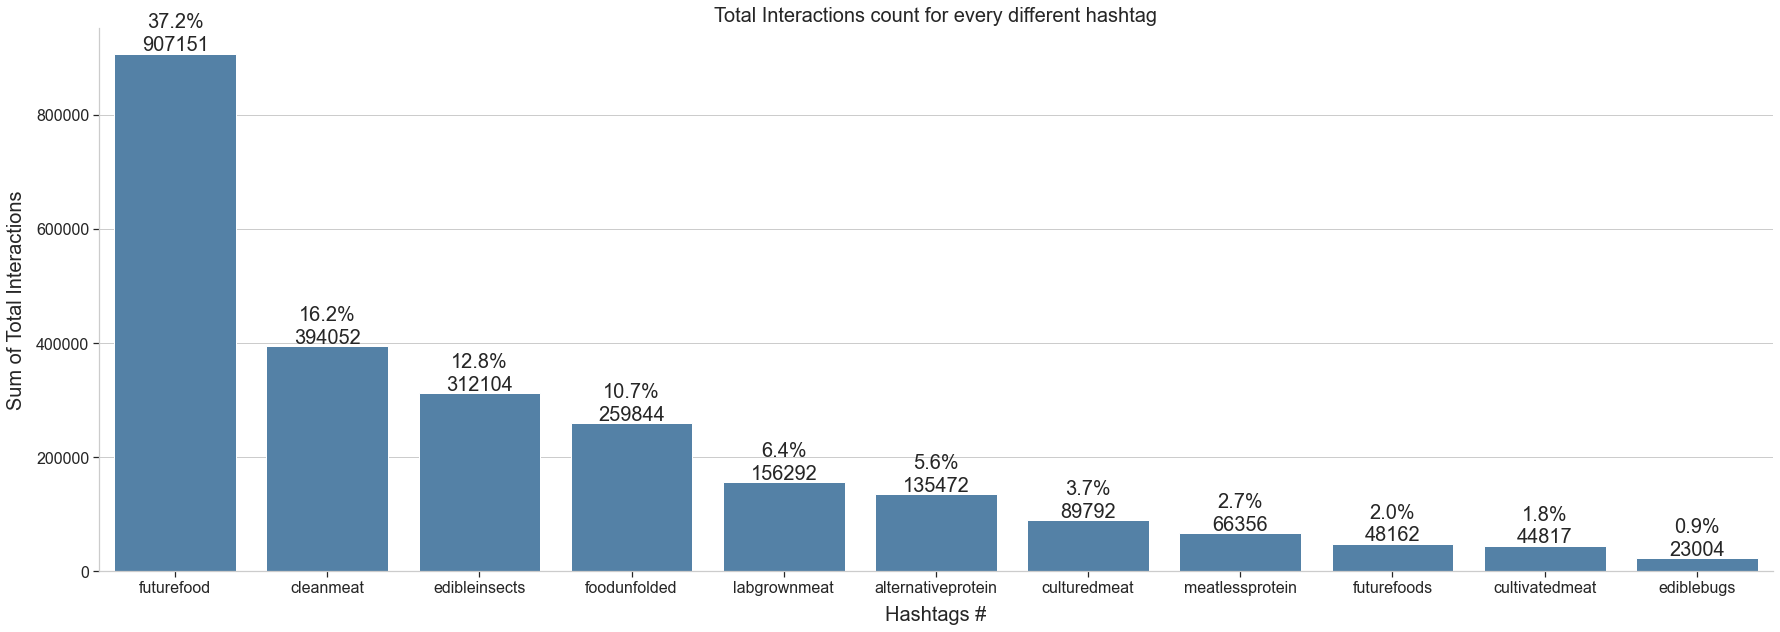

In [13]:
## Use the trimmed df5 to create new dataframe
tsum_list = []
for tag in tag_unique:  
    tsum_list.append(df5_trimmed.loc[df5[tag] ==1, 'Total Interactions'].sum())

print(tsum_list)
tsum_df = pd.DataFrame({"Sum of Total Interactions" : tsum_list}, index = tag_unique.tolist())
tsum_df.sort_values('Sum of Total Interactions',ascending = False, inplace = True)
tsum_df.reset_index(inplace=True)
tsum_df= tsum_df.rename(columns={'index':'Hashtags'})
tsum_df['Percentage'] = tsum_df['Sum of Total Interactions']/sum(tsum_df['Sum of Total Interactions']) *100

## Plotting the distribution of total intereactions for every hashtag
custom_params = {'xtick.bottom': True,'ytick.left': True}
sns.set_theme(style="whitegrid",rc=custom_params)
f, ax3 = plt.subplots(figsize=(30, 10))
sns.despine(f)
sns.barplot(x= 'Hashtags', y='Sum of Total Interactions', data=tsum_df, color="steelblue")
plt.title('Total Interactions count for every different hashtag',fontsize= 20)
plt.xlabel('Hashtags #',fontsize=20, labelpad= 10)
plt.ylabel('Sum of Total Interactions',fontsize=20, labelpad= 10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Putting labels of count and percentage on top of each bar in the graph

patches2 = ax3.patches
for i in range(len(patches2)):
   x1 = patches2[i].get_x() + patches2[i].get_width()/2
   y1 = patches2[i].get_height() +5000
   z1 = patches2[i].get_height() +45000

   ax3.annotate('{:}'.format(tsum_df['Sum of Total Interactions'][i]), (x1, y1), ha='center',fontsize= 20)
   ax3.annotate('{:.1f}%'.format(tsum_df['Percentage'][i]), (x1, z1), ha='center',fontsize= 20)
plt.show()

<AxesSubplot:xlabel='Hashtags', ylabel='Sum of Likes'>

Text(0.5, 1.0, 'Total number of Likes for every different hashtag')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Total number of likes')

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'cleanmeat'),
  Text(2, 0, 'edibleinsects'),
  Text(3, 0, 'foodunfolded'),
  Text(4, 0, 'labgrownmeat'),
  Text(5, 0, 'alternativeprotein'),
  Text(6, 0, 'culturedmeat'),
  Text(7, 0, 'meatlessprotein'),
  Text(8, 0, 'futurefoods'),
  Text(9, 0, 'cultivatedmeat'),
  Text(10, 0, 'ediblebugs')])

Text(0.0, 882212.0, '877212')

Text(0.0, 917212.0, '37.3%')

Text(1.0, 385989.0, '380989')

Text(1.0, 420989.0, '16.2%')

Text(2.0, 303033.0, '298033')

Text(2.0, 338033.0, '12.7%')

Text(3.0, 259244.0, '254244')

Text(3.0, 294244.0, '10.8%')

Text(4.0, 154812.0, '149812')

Text(4.0, 189812.0, '6.4%')

Text(5.0, 136368.0, '131368')

Text(5.0, 171368.0, '5.6%')

Text(6.0, 90907.0, '85907')

Text(6.0, 125907.0, '3.6%')

Text(7.0, 70296.0, '65296')

Text(7.0, 105296.0, '2.8%')

Text(8.0, 51872.0, '46872')

Text(8.0, 86872.0, '2.0%')

Text(9.0, 48036.0, '43036')

Text(9.0, 83036.0, '1.8%')

Text(10.0, 27114.0, '22114')

Text(10.0, 62114.0, '0.9%')

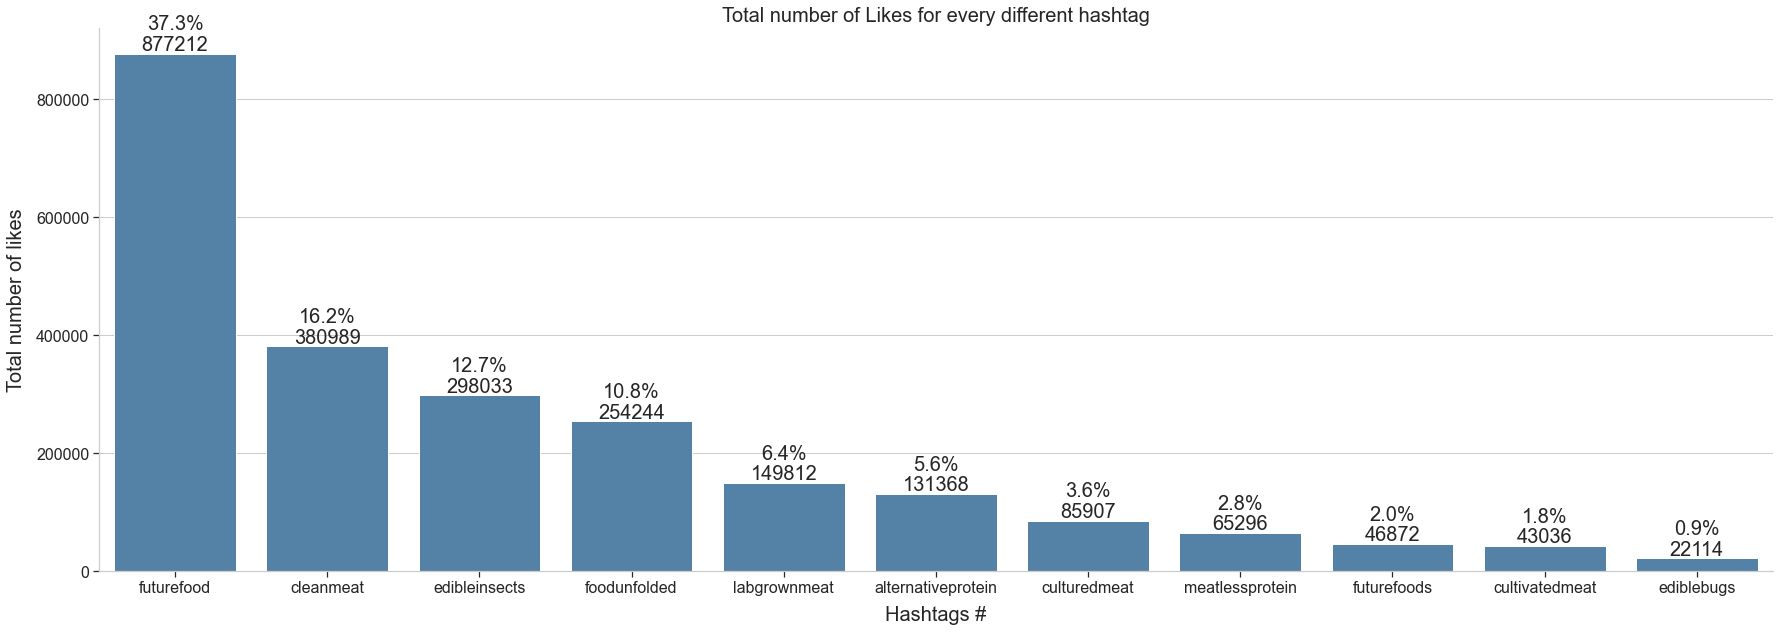

In [14]:
## Dataframe to include columns to identify likes
df6 = df3.sort_values('id')
for tag in tag_unique:
    df6[tag] = df6['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)

likes_list = []
for tag in tag_unique:  
    likes_list.append(df6.loc[df6[tag] == 1, 'Likes'].sum())

likes_df = pd.DataFrame({"Sum of Likes" : likes_list}, index = tag_unique.tolist())
likes_df.sort_values('Sum of Likes',ascending = False, inplace = True)
likes_df.reset_index(inplace=True)
likes_df= likes_df.rename(columns={'index':'Hashtags'})
likes_df['Percentage'] = likes_df['Sum of Likes']/sum(likes_df['Sum of Likes']) *100

## Plotting Total number of likes for every different hashtag
custom_params = {'xtick.bottom': True,'ytick.left': True}
sns.set_theme(style="whitegrid",rc=custom_params)
f, ax4 = plt.subplots(figsize=(30, 10))
sns.despine(f)
sns.barplot(x= 'Hashtags', y='Sum of Likes', data=likes_df, color="steelblue")
plt.title('Total number of Likes for every different hashtag',fontsize= 20)
plt.xlabel('Hashtags #',fontsize=20, labelpad= 10)
plt.ylabel('Total number of likes',fontsize=20, labelpad= 10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Putting labels of count and percentage on top of each bar in the graph

patches3 = ax4.patches
for i in range(len(patches3)):
   x2 = patches3[i].get_x() + patches3[i].get_width()/2
   y2 = patches3[i].get_height() +5000
   z2 = patches3[i].get_height() +40000

   ax4.annotate('{:}'.format(likes_df['Sum of Likes'][i]), (x2, y2), ha='center',fontsize= 20)
   ax4.annotate('{:.1f}%'.format(likes_df['Percentage'][i]), (x2, z2), ha='center',fontsize= 20)
plt.show()

[4104, 5600, 29939, 1060, 6480, 1781, 13063, 3885, 14071, 1290, 890]


<AxesSubplot:xlabel='Hashtags', ylabel='Sum of Comments'>

Text(0.5, 1.0, 'Total number of Comments for every different hashtag')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Total number of Comments')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'futurefood'),
  Text(1, 0, 'edibleinsects'),
  Text(2, 0, 'cleanmeat'),
  Text(3, 0, 'labgrownmeat'),
  Text(4, 0, 'foodunfolded'),
  Text(5, 0, 'alternativeprotein'),
  Text(6, 0, 'culturedmeat'),
  Text(7, 0, 'cultivatedmeat'),
  Text(8, 0, 'futurefoods'),
  Text(9, 0, 'meatlessprotein'),
  Text(10, 0, 'ediblebugs')])

Text(0.0, 30089.0, '29939')

Text(0.0, 31239.0, '36.4%')

Text(1.0, 14221.0, '14071')

Text(1.0, 15371.0, '17.1%')

Text(2.0, 13213.0, '13063')

Text(2.0, 14363.0, '15.9%')

Text(3.0, 6630.0, '6480')

Text(3.0, 7780.0, '7.9%')

Text(4.0, 5750.0, '5600')

Text(4.0, 6900.0, '6.8%')

Text(5.0, 4254.0, '4104')

Text(5.0, 5404.0, '5.0%')

Text(6.0, 4035.0, '3885')

Text(6.0, 5185.0, '4.7%')

Text(7.0, 1931.0, '1781')

Text(7.0, 3081.0, '2.2%')

Text(8.0, 1440.0, '1290')

Text(8.0, 2590.0, '1.6%')

Text(9.0, 1210.0, '1060')

Text(9.0, 2360.0, '1.3%')

Text(10.0, 1040.0, '890')

Text(10.0, 2190.0, '1.1%')

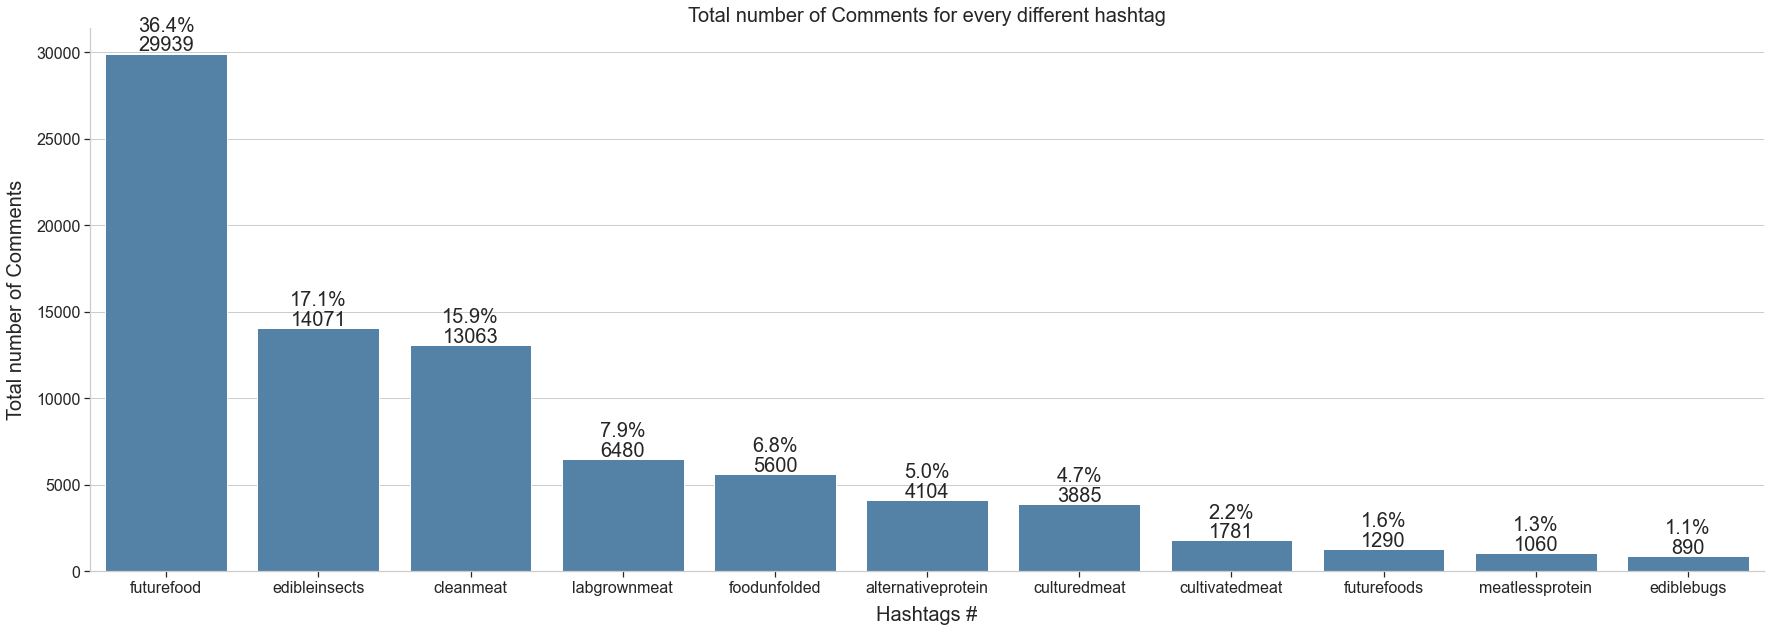

In [15]:
## Creating new dataframe to inlcude sum for comments
df7 = df3.sort_values('id')
for tag in tag_unique:
    df7[tag] = df7['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)

Comments_list = []
for tag in tag_unique:  
    Comments_list.append(df7.loc[df7[tag] == 1, 'Comments'].sum())

print(Comments_list)
Comments_df = pd.DataFrame({"Sum of Comments" : Comments_list}, index = tag_unique.tolist())
Comments_df.sort_values('Sum of Comments',ascending = False, inplace = True)
Comments_df.reset_index(inplace=True)
Comments_df= Comments_df.rename(columns={'index':'Hashtags'})
Comments_df['Percentage'] = Comments_df['Sum of Comments']/sum(Comments_df['Sum of Comments']) *100

## Plotting Total number of likes for every different hashtag
custom_params = {'xtick.bottom': True,'ytick.left': True}
sns.set_theme(style="whitegrid",rc=custom_params)
f, ax5 = plt.subplots(figsize=(30, 10))
sns.despine(f)
sns.barplot(x= 'Hashtags', y='Sum of Comments', data=Comments_df, color="steelblue")
plt.title('Total number of Comments for every different hashtag',fontsize= 20)
plt.xlabel('Hashtags #',fontsize=20, labelpad= 10)
plt.ylabel('Total number of Comments',fontsize=20, labelpad= 10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Putting labels of count and percentage on top of each bar in the graph

patches4 = ax5.patches
for i in range(len(patches4)):
   x3 = patches4[i].get_x() + patches4[i].get_width()/2
   y3 = patches4[i].get_height() +150
   z3 = patches4[i].get_height() +1300

   ax5.annotate('{:}'.format(Comments_df['Sum of Comments'][i]), (x3, y3), ha='center',fontsize= 20)
   ax5.annotate('{:.1f}%'.format(Comments_df['Percentage'][i]), (x3, z3), ha='center',fontsize= 20)
plt.show()

id                 Account             User Name  Followers at Posting             Post Created Post Created Date Post Created Time   Type Total Interactions  Likes  Comments  Views  Like and View Counts Disabled                                       URL                                                                                                                                                                                                                                                                                 Photo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description                                                                                                                   Image Text  Sponsor Id Sponsor Name Overperforming Score             HASHTAG  alternativeprotein  foodunfolded  futurefood  meatlessprotein  labgrownmeat  cultivatedmeat  cleanmeat  culturedmeat  edibleinsects  futurefoods  ediblebugs
0   0        Genelia Deshmukh              geneliad             7291844.0  2021-10-16 05:22:21 EDT        2021-10-16          05:22:21  Album             49 779  49634       145      0                          False  https://www.instagram.com/p/CVFZVlsogvO/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/246276386_246951120783485_3238136309611538599_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=OnNeGx8TluQAX9UBzao&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9usnNIWXLUn-EHWuNd7z1LzLTyIMDnp3FRQv_TAmb1fg&oe=62E48BAF                                                                                                                                                                                                                                                                                              #worldfoodday2021 \n\n We need to make our food - our investment into our health, our being and all the other beings that exist and most importantly our planet 💚\n\nLet’s change our planet - One bite at a time..\n\nWww.imaginemeats.com\n\n•\n#ImagineMeats #ImagineChicken #ImagineMutton #Plantbased #Plantbasedmeat #Plantlover #Happymeat #Meatfree #Meatlesseveryday #alternativeprotein #Meatlessmeat #Crueltyfree #worldfoodday2021                                                                                                                          NaN         NaN          NaN                -6.16  alternativeprotein                   1             0           0                0             0               0          0             0              0            0           0
1   1           The N kitchen       blend.of.spices                   NaN  2022-01-05 11:13:43 EST        2022-01-05          11:13:43  Album             46 189  46025       164      0                          False  https://www.instagram.com/p/CYWszc_PzsB/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/271304997_228085712837104_2842214994172471325_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=qrjgj-0YJ64AX81LGaA&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9ZaF0DwmVaaKX54JYylFWwTebxIRkUR3PJ9z5Bnyx8uw&oe=62E44E12  Swipe left to Choose your favorite chole combo ➡️➡️ \n. \n1. Chole Bhature 🍱🍱\n. \n2. Chole Samosa🧆🧆\n. \n3. Chole Paratha🥙🥙\n. \n4. Chole Kulcha🥘🥘\n. \n5. Chole Chawal🍛🍛\n. \n6. Chole Kachori🍲🍲\n. \n7. Chole Naan🌮🌮\n. \n8. Chole Tikki🍝🍝\n. \n9. Chole Poori🍜🍜\n\nC

[249958, 2590719, 2582029, 4603, 572255, 186517, 764118, 1222060, 698340, 431373, 64991]


<AxesSubplot:xlabel='Hashtags', ylabel='Sum of Views'>

Text(0.5, 1.0, 'Total number of Views for every different hashtag')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Total number of Views')

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'foodunfolded'),
  Text(1, 0, 'futurefood'),
  Text(2, 0, 'culturedmeat'),
  Text(3, 0, 'cleanmeat'),
  Text(4, 0, 'edibleinsects'),
  Text(5, 0, 'labgrownmeat'),
  Text(6, 0, 'futurefoods'),
  Text(7, 0, 'alternativeprotein'),
  Text(8, 0, 'cultivatedmeat'),
  Text(9, 0, 'ediblebugs'),
  Text(10, 0, 'meatlessprotein')])

Text(0.0, 2605719.0, '2590719')

Text(0.0, 2720719.0, '27.7%')

Text(1.0, 2597029.0, '2582029')

Text(1.0, 2712029.0, '27.6%')

Text(2.0, 1237060.0, '1222060')

Text(2.0, 1352060.0, '13.0%')

Text(3.0, 779118.0, '764118')

Text(3.0, 894118.0, '8.2%')

Text(4.0, 713340.0, '698340')

Text(4.0, 828340.0, '7.5%')

Text(5.0, 587255.0, '572255')

Text(5.0, 702255.0, '6.1%')

Text(6.0, 446373.0, '431373')

Text(6.0, 561373.0, '4.6%')

Text(7.0, 264958.0, '249958')

Text(7.0, 379958.0, '2.7%')

Text(8.0, 201517.0, '186517')

Text(8.0, 316517.0, '2.0%')

Text(9.0, 79991.0, '64991')

Text(9.0, 194991.0, '0.7%')

Text(10.0, 19603.0, '4603')

Text(10.0, 134603.0, '0.0%')

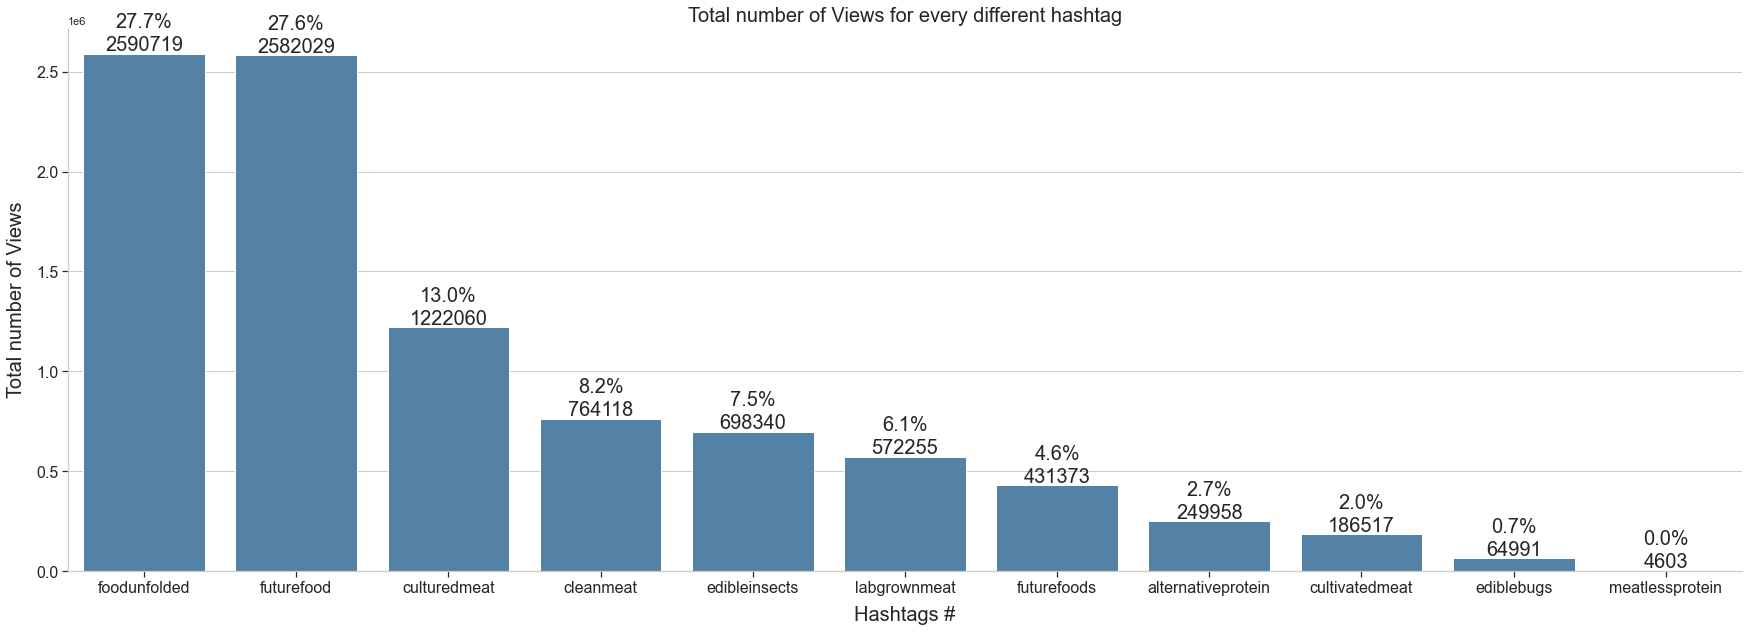

In [16]:
## Views
df8 = df3.sort_values('id')
for tag in tag_unique:
    df8[tag] = df8['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)
df8.head()

Views_list = []
for tag in tag_unique:  
    Views_list.append(df8.loc[df8[tag] == 1, 'Views'].sum())

print(Views_list)
Views_df = pd.DataFrame({"Sum of Views" : Views_list}, index = tag_unique.tolist())
Views_df.sort_values('Sum of Views',ascending = False, inplace = True)
Views_df.reset_index(inplace=True)
Views_df= Views_df.rename(columns={'index':'Hashtags'})
Views_df['Percentage'] = Views_df['Sum of Views']/sum(Views_df['Sum of Views']) *100

## Plotting Total number of Views for every different hashtag
custom_params = {'xtick.bottom': True,'ytick.left': True}
sns.set_theme(style="whitegrid",rc=custom_params)
f, ax6 = plt.subplots(figsize=(30, 10))
sns.despine(f)
sns.barplot(x= 'Hashtags', y='Sum of Views', data= Views_df, color="steelblue")
plt.title('Total number of Views for every different hashtag',fontsize= 20)
plt.xlabel('Hashtags #',fontsize=20, labelpad= 10)
plt.ylabel('Total number of Views',fontsize=20, labelpad= 10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Putting labels of count and percentage on top of each bar in the graph

patches5 = ax6.patches
for i in range(len(patches5)):
   x4 = patches5[i].get_x() + patches5[i].get_width()/2
   y4 = patches5[i].get_height() +15000
   z4 = patches5[i].get_height() +130000

   ax6.annotate('{:}'.format(Views_df['Sum of Views'][i]), (x4, y4), ha='center',fontsize= 20)
   ax6.annotate('{:.1f}%'.format(Views_df['Percentage'][i]), (x4, z4), ha='center',fontsize= 20)
plt.show()

<AxesSubplot:xlabel='Hashtags', ylabel='Sum of OverallScores'>

Text(0.5, 1.0, 'Total number of OverallScores for every different hashtag')

Text(0.5, 0, 'Hashtags #')

Text(0, 0.5, 'Total number of OverallScores')

(-10585.322, 0.0)

(-11000.0, 0.0)

(array([-12000., -10000.,  -8000.,  -6000.,  -4000.,  -2000.,      0.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 1, 'futurefood'),
  Text(1, 1, 'culturedmeat'),
  Text(2, 1, 'cleanmeat'),
  Text(3, 1, 'ediblebugs'),
  Text(4, 1, 'alternativeprotein'),
  Text(5, 1, 'labgrownmeat'),
  Text(6, 1, 'futurefoods'),
  Text(7, 1, 'cultivatedmeat'),
  Text(8, 1, 'foodunfolded'),
  Text(9, 1, 'edibleinsects'),
  Text(10, 1, 'meatlessprotein')])

Text(0.0, -10480.59, '-10080.6')

Text(0.0, -10980.59, '57.1%')

Text(1.0, -3418.7500000000005, '-3018.8')

Text(1.0, -3918.7500000000005, '17.1%')

Text(2.0, -2078.1699999999996, '-1678.2')

Text(2.0, -2578.1699999999996, '9.5%')

Text(3.0, -1333.6499999999999, '-933.6')

Text(3.0, -1833.6499999999999, '5.3%')

Text(4.0, -1201.88, '-801.9')

Text(4.0, -1701.88, '4.5%')

Text(5.0, -1008.69, '-608.7')

Text(5.0, -1508.69, '3.4%')

Text(6.0, -740.26, '-340.3')

Text(6.0, -1240.26, '1.9%')

Text(7.0, -512.63, '-112.6')

Text(7.0, -1012.63, '0.6%')

Text(8.0, -461.05000000000007, '-61.1')

Text(8.0, -961.0500000000001, '0.3%')

Text(9.0, -437.5999999999999, '-37.6')

Text(9.0, -937.5999999999999, '0.2%')

Text(10.0, -385.95, '14.1')

Text(10.0, -885.95, '-0.1%')

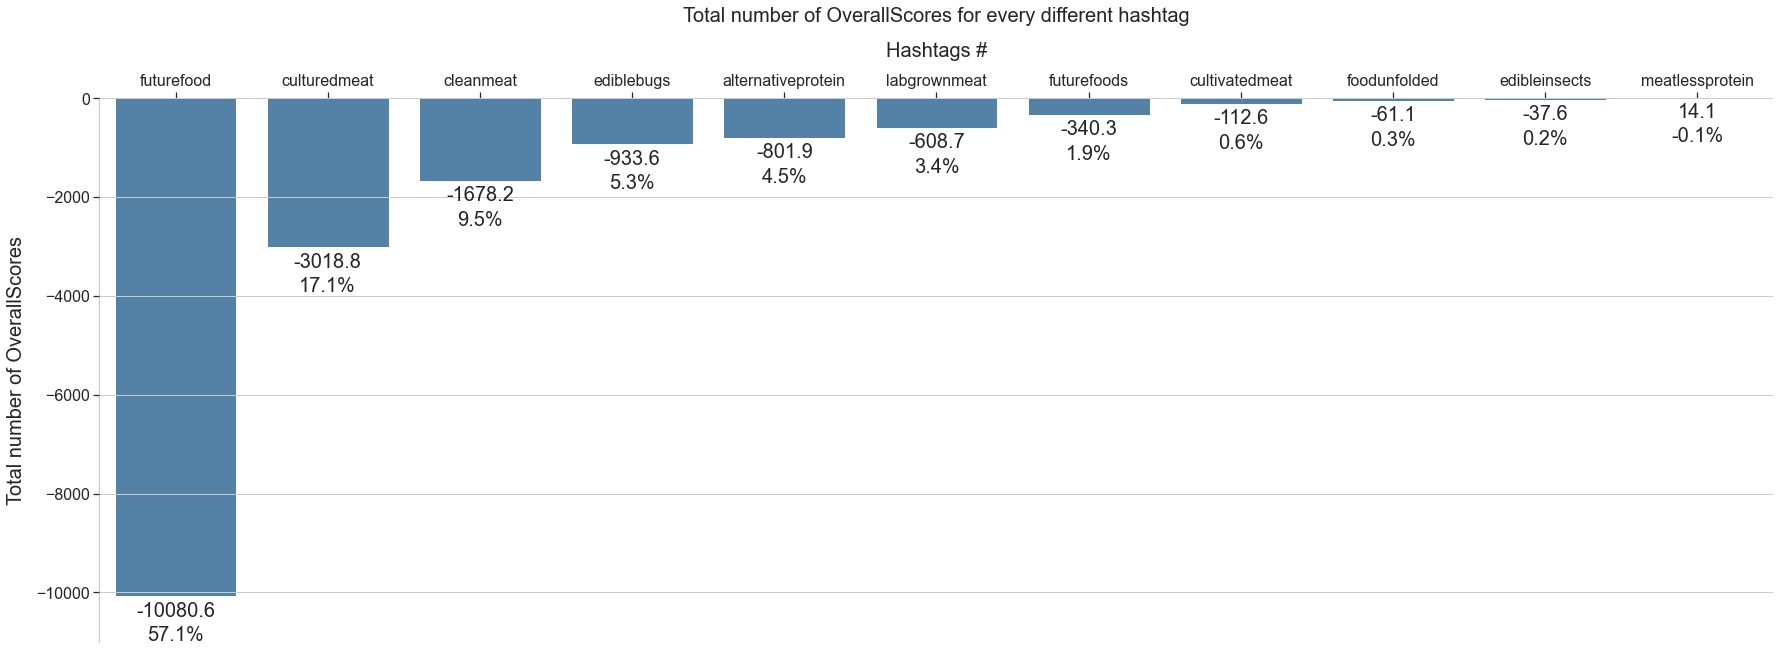

In [17]:
## OverallScores
df9 = df3.sort_values('id')
for tag in tag_unique:
    df9[tag] = df9['HASHTAG'].str.split(',').apply(lambda x: 1 if tag in x else 0)

df9_trimmed = df9.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x)
df9_trimmed["Overperforming Score"] = pd.to_numeric(df9_trimmed["Overperforming Score"])

OverallScores_list = []
for tag in tag_unique:  
    OverallScores_list.append(df9_trimmed.loc[df9_trimmed[tag] == 1, 'Overperforming Score'].sum())

OverallScores_df = pd.DataFrame({"Sum of OverallScores" : OverallScores_list}, index = tag_unique.tolist())
OverallScores_df.sort_values('Sum of OverallScores',ascending = True, inplace = True)

OverallScores_df.reset_index(inplace=True)
OverallScores_df= OverallScores_df.rename(columns={'index':'Hashtags'})
OverallScores_df['Percentage'] = OverallScores_df['Sum of OverallScores']/sum(OverallScores_df['Sum of OverallScores']) *100

## Plotting Total number of OverallScores for every different hashtag
custom_params = {'ytick.left': True, 'axes.axisbelow':False, 'axes.spines.top': False, 'axes.spines.bottom': False, 'axes.spines.right': False}
sns.set_theme(style="whitegrid",rc=custom_params)
f, ax7 = plt.subplots(figsize=(30, 10))
sns.barplot(x= 'Hashtags', y='Sum of OverallScores', data= OverallScores_df, color="steelblue")
plt.title('Total number of OverallScores for every different hashtag',fontsize= 20, pad=20)
plt.xlabel('Hashtags #',fontsize=20, labelpad= -600)
plt.ylabel('Total number of OverallScores',fontsize=20, labelpad= 10)
ax7.xaxis.tick_top()
plt.ylim(ymax=0)
plt.ylim(ymin=-11000)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)


## Putting labels of count and percentage on top of each bar in the graph

patches6 = ax7.patches
for i in range(len(patches6)):
   x5 = patches6[i].get_x() + patches6[i].get_width()/2
   y5 = patches6[i].get_height() -400
   z5 = patches6[i].get_height() -900

   ax7.annotate('{:.0001f}'.format(OverallScores_df['Sum of OverallScores'][i]), (x5, y5), ha='center',fontsize= 20)
   ax7.annotate('{:.1f}%'.format(OverallScores_df['Percentage'][i]), (x5, z5), ha='center',fontsize= 20)
plt.show()
 

Total Interactions
0           45.913323
1           42.585671
2           28.623437
3           19.179951
4           17.855379

binary_outlier
0               0
1               0
2               0
3               0
4               0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 0 to 10166
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             10167 non-null  int64  
 1   Account                        10154 non-null  object 
 2   User Name                      10167 non-null  object 
 3   Followers at Posting           4129 non-null   float64
 4   Post Created                   10167 non-null  object 
 5   Post Created Date              10167 non-null  object 
 6   Post Created Time              10167 non-null  object 
 7   Type                           10167 non-null  object 
 8   Total Interactions             10167 non-null  int64  
 9   Likes                          10167 non-null  int64  
 10  Comments                       10167 non-null  int64  
 11  Views                          10167 non-null  int64  
 12  Like and View Counts Disabled  10167 non-null 

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 1.0, 'Density plot for Total Interactions')

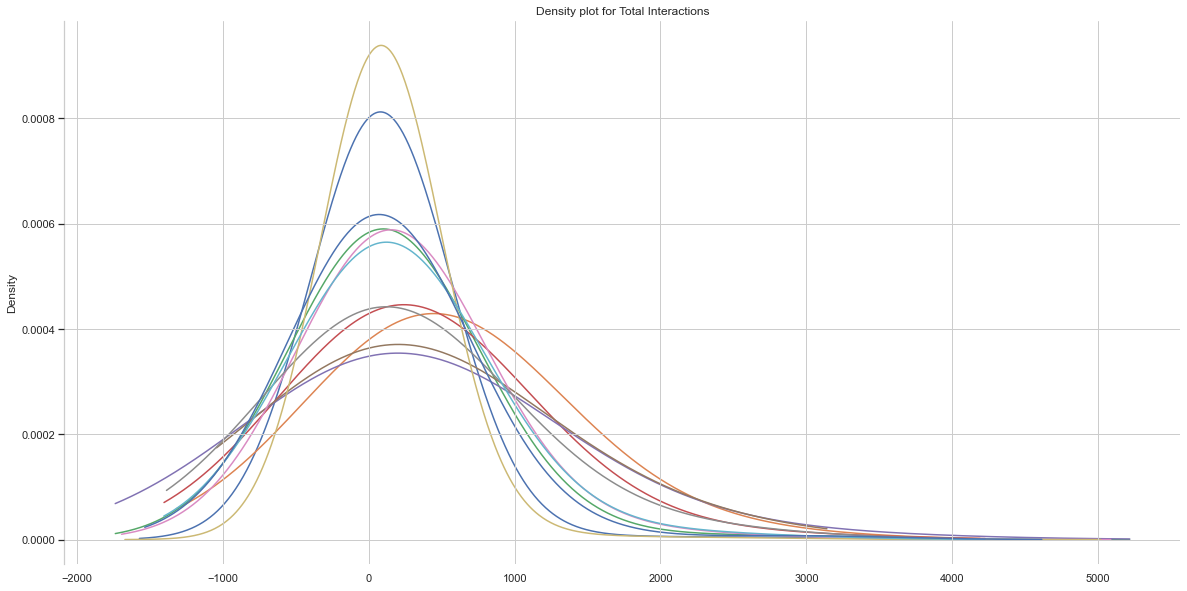

In [18]:
def zscore(x):
    mu = x.mean()
    std = x.std()

    return (x - mu)/std

total_interactions_column = df5_trimmed.loc[:,"Total Interactions"]

# change from sereies to dataframe
total_interactions_column_df = pd.DataFrame(total_interactions_column)
zscore_total_interactions = total_interactions_column_df.apply(zscore)
zscore_total_interactions.head()

def binary_zscore(x):
    if x > 3 or x < -3:
        return 0
    else:
        return 1

binary_zscore_total_interactions = zscore_total_interactions.applymap(binary_zscore)
# rename column name to "binary_outlier" from "Total Interactions"
binary_zscore_total_interactions.rename(columns = {'Total Interactions':'binary_outlier'}, inplace = True)
binary_zscore_total_interactions.head()
# apped the binary_outlier column to the original dataframe
df5_trimmed = pd.concat([df5_trimmed, binary_zscore_total_interactions], axis = 1)
# check the datatype of the binary_zscore_total_interactions column
df5_trimmed.info()

# get rid of outliers in total interactions graph
for tag in tag_unique:
    df5_trimmed[(df5_trimmed[tag] == 1) & (df5_trimmed['binary_outlier'] == 1)]['Total Interactions'].plot.density(bw_method = 1.75,figsize = (20,10))

plt.title('Density plot for Total Interactions')
plt.show()

Text(0.5, 1.0, 'Density plot for Total Interactions of each hashtag')

Text(0.5, 0, 'Total Interactions')

Text(0, 0.5, 'Density')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

<AxesSubplot:title={'center':'Density plot for Total Interactions of each hashtag'}, xlabel='Total Interactions', ylabel='Density'>

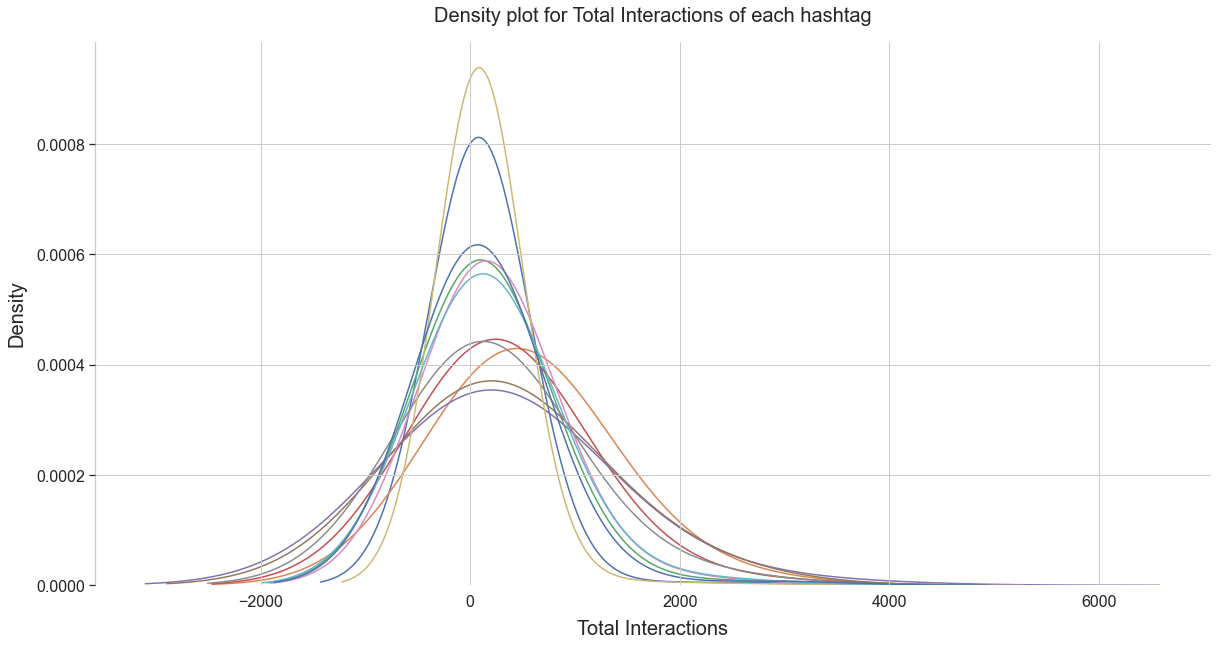

In [19]:
f, ax8 = plt.subplots(figsize=(20, 10))
sns.set_theme(style="whitegrid")
plt.title('Density plot for Total Interactions of each hashtag',fontsize= 20, pad=20)
plt.xlabel('Total Interactions',fontsize=20, labelpad= 10)
plt.ylabel('Density',fontsize=20, labelpad= 10)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
for tag in tag_unique:
    sns.kdeplot(data=df5_trimmed[(df5_trimmed[tag] == 1) & (df5_trimmed['binary_outlier'] == 1)]['Total Interactions'],bw_method = 1.75, label="Long")


<Figure size 1440x720 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

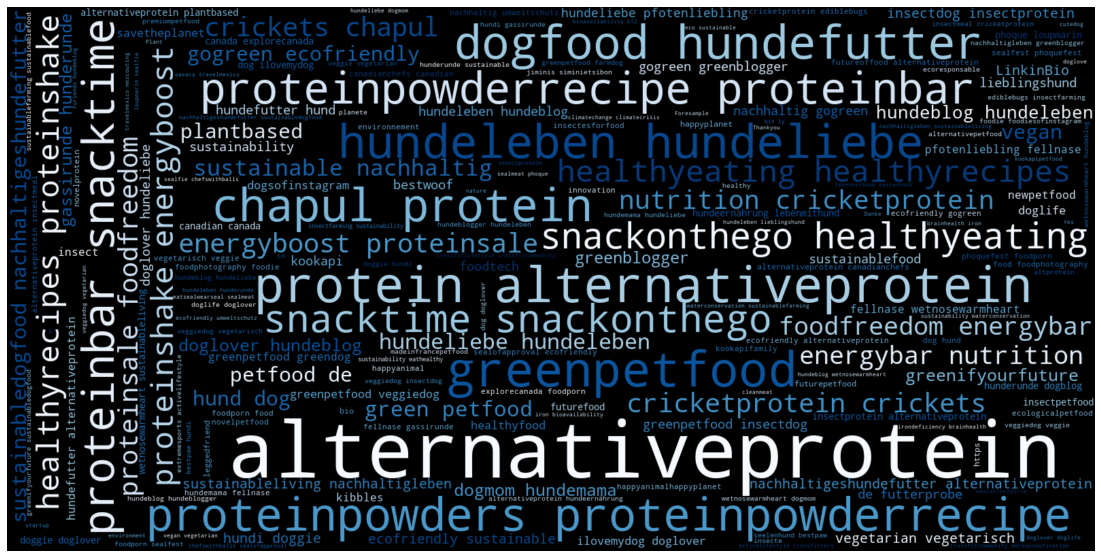

<Figure size 1440x720 with 0 Axes>

KeyboardInterrupt: 

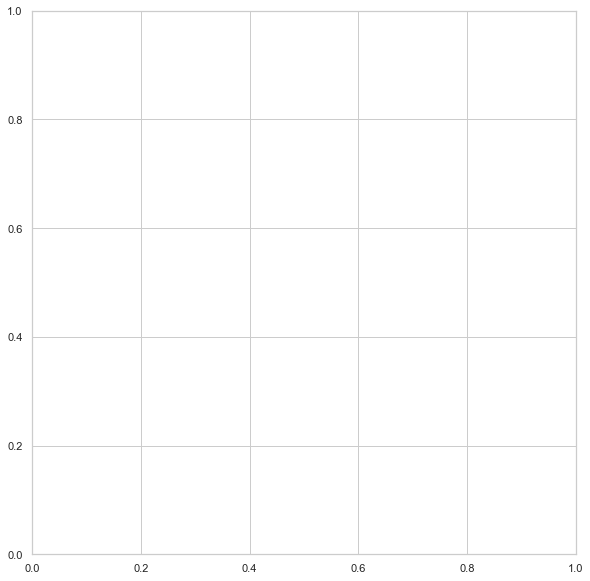

In [20]:
## word clouds of the descriptions for every hashtag (or the most used)
## Importing all packages
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

## Using df5_trimmed as the base and creating a new datafram that includes only the Description column for faster data processing
Description_Df = df5_trimmed[['Description','alternativeprotein', 'foodunfolded', 'futurefood',
       'meatlessprotein', 'labgrownmeat', 'cultivatedmeat', 'cleanmeat',
       'culturedmeat', 'edibleinsects', 'futurefoods', 'ediblebugs']]

## Creating a function that query the Description_Df and return a df that contains only the values of the specific hashtag
def df_specific(input_dataframe,input_tag):
       returned_df = input_dataframe[input_dataframe[input_tag]==1]['Description']
       return returned_df

## More Processing
al = df_specific(Description_Df, 'alternativeprotein')
d= {}
for tag in tag_unique:
       d[tag] = df_specific(Description_Df,tag)

all_list = []
for tag in d:
       all_list.append(' '.join(d[tag]))

## Using for loop to generate wordcloud for each hashtag
for i in range(10):
    text = all_list[i]
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=1600,height=800,colormap="Blues").generate(text)

    # Display the generated image:
    plt.figure( figsize = (20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [ ]:
df5_trimmed['id'] = df5_trimmed.index
first_column = df5_trimmed.pop('id')
df5_trimmed.insert(0,'id', first_column)

df_for_model = df5_trimmed[['Description']]
series = df_for_model['Description'].values.tolist()
series = [str(i) for i in series]

##new_list = []
##for i in series:
    ##if len(i) <= 514:
        ##new_list.append(i)   

In [ ]:
## Generating Sentimental Scores
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
scores_list = []
for i in series:
    scores_list.append(analyzer.polarity_scores(i))
## turn the results into a dataframe

df_scores_list = pd.DataFrame(scores_list)

print(df_scores_list)

df_senti_score = pd.merge(df5_trimmed, df_scores_list, left_index= True, right_index = True)
df_senti_score.head()
df_senti_score.info()

         neg    neu    pos  compound
0      0.000  0.625  0.375    0.6369
1      0.000  1.000  0.000    0.0000
2      0.000  0.733  0.267    0.5080
3      0.196  0.804  0.000   -0.2960
4      0.000  1.000  0.000    0.0000
...      ...    ...    ...       ...
10162  0.000  0.656  0.344    0.6369
10163  0.000  1.000  0.000    0.0000
10164  0.000  1.000  0.000    0.0000
10165  0.000  1.000  0.000    0.0000
10166  0.000  1.000  0.000    0.0000

[10167 rows x 4 columns]


id               Account             User Name  Followers at Posting           Post Created Post Created Date Post Created Time   Type  Total Interactions  Likes  Comments  Views  Like and View Counts Disabled                                       URL                                                                                                                                                                                                                                                                                 Photo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Description                                                                                             Image Text  Sponsor Id Sponsor Name Overperforming Score             HASHTAG  alternativeprotein  foodunfolded  futurefood  meatlessprotein  labgrownmeat  cultivatedmeat  cleanmeat  culturedmeat  edibleinsects  futurefoods  ediblebugs  binary_outlier    neg    neu    pos  compound
0   0       GeneliaDeshmukh              geneliad             7291844.0  2021-10-1605:22:21EDT        2021-10-16          05:22:21  Album               49779  49634       145      0                          False  https://www.instagram.com/p/CVFZVlsogvO/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/246276386_246951120783485_3238136309611538599_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=OnNeGx8TluQAX9UBzao&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9usnNIWXLUn-EHWuNd7z1LzLTyIMDnp3FRQv_TAmb1fg&oe=62E48BAF                                                                                                                                                                                                                                                                  #worldfoodday2021\n\nWeneedtomakeourfood-ourinvestmentintoourhealth,ourbeingandalltheotherbeingsthatexistandmostimportantlyourplanet💚\n\nLet’schangeourplanet-Onebiteatatime..\n\nWww.imaginemeats.com\n\n•\n#ImagineMeats#ImagineChicken#ImagineMutton#Plantbased#Plantbasedmeat#Plantlover#Happymeat#Meatfree#Meatlesseveryday#alternativeprotein#Meatlessmeat#Crueltyfree#worldfoodday2021                                                                                                    NaN         NaN          NaN                -6.16  alternativeprotein                   1             0           0                0             0               0          0             0              0            0           0               0  0.000  0.625  0.375    0.6369
1   1           TheNkitchen       blend.of.spices                   NaN  2022-01-0511:13:43EST        2022-01-05          11:13:43  Album               46189  46025       164      0                          False  https://www.instagram.com/p/CYWszc_PzsB/   https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/271304997_228085712837104_2842214994172471325_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=qrjgj-0YJ64AX81LGaA&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AT9ZaF0DwmVaaKX54JYylFWwTebxIRkUR3PJ9z5Bnyx8uw&oe=62E44E12  SwipelefttoChooseyourfavoritecholecombo➡️➡️\n.\n1.CholeBhature🍱🍱\n.\n2.CholeSamosa🧆🧆\n.\n3.CholeParatha🥙🥙\n.\n4.CholeKulcha🥘🥘\n.\n5.CholeChawal🍛🍛\n.\n6.CholeKachori🍲🍲\n.\n7.CholeNaan🌮🌮\n.\n8.CholeTikki🍝🍝\n.\n9.CholePoori🍜🍜\n\nCommentdownyourfavouritecomboandformoresuchupdatesfollow@blend.of.spices@blend.of.spices\n@blend.of.spices@blend.of.spices\n\n#choleplatter#cholecombo#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 0 to 10166
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             10167 non-null  int64  
 1   Account                        10154 non-null  object 
 2   User Name                      10167 non-null  object 
 3   Followers at Posting           4129 non-null   float64
 4   Post Created                   10167 non-null  object 
 5   Post Created Date              10167 non-null  object 
 6   Post Created Time              10167 non-null  object 
 7   Type                           10167 non-null  object 
 8   Total Interactions             10167 non-null  int64  
 9   Likes                          10167 non-null  int64  
 10  Comments                       10167 non-null  int64  
 11  Views                          10167 non-null  int64  
 12  Like and View Counts Disabled  10167 non-null 

alternativeprotein


Text(0.5, 0.98, 'alternativeprotein')

foodunfolded


Text(0.5, 0.98, 'foodunfolded')

futurefood


Text(0.5, 0.98, 'futurefood')

meatlessprotein


Text(0.5, 0.98, 'meatlessprotein')

labgrownmeat


Text(0.5, 0.98, 'labgrownmeat')

cultivatedmeat


Text(0.5, 0.98, 'cultivatedmeat')

cleanmeat


Text(0.5, 0.98, 'cleanmeat')

culturedmeat


Text(0.5, 0.98, 'culturedmeat')

edibleinsects


Text(0.5, 0.98, 'edibleinsects')

futurefoods


Text(0.5, 0.98, 'futurefoods')

ediblebugs


Text(0.5, 0.98, 'ediblebugs')

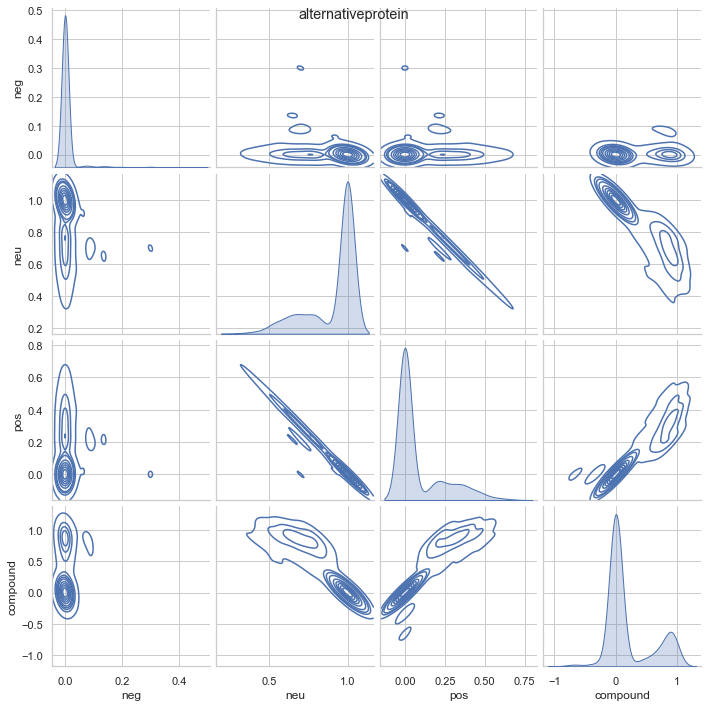

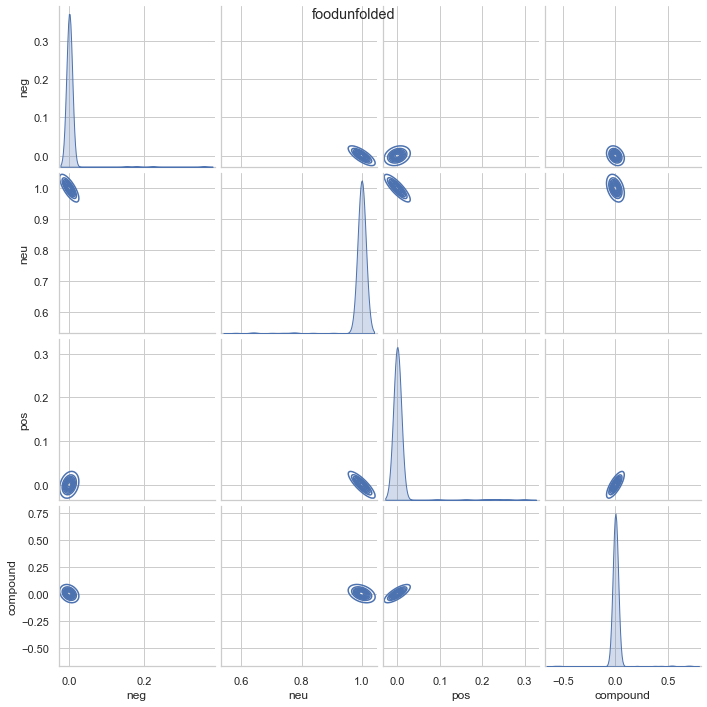

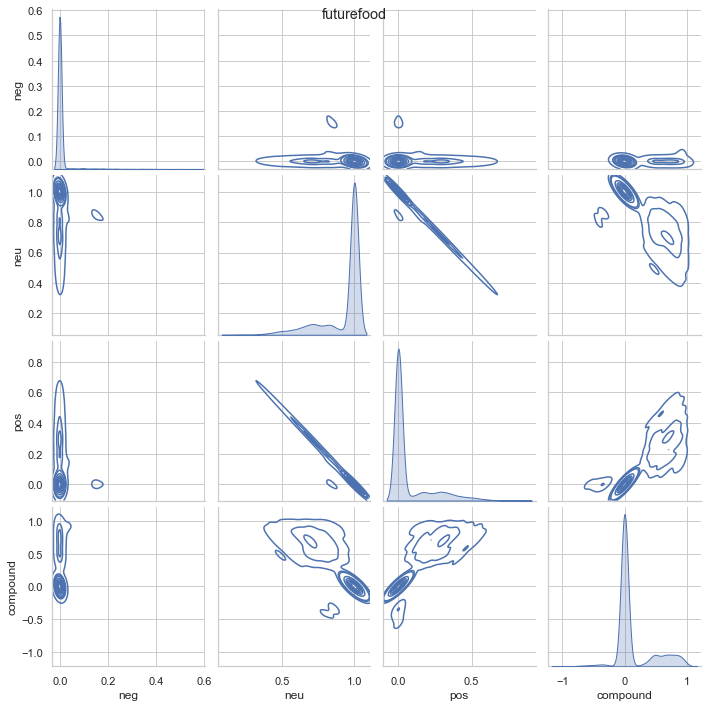

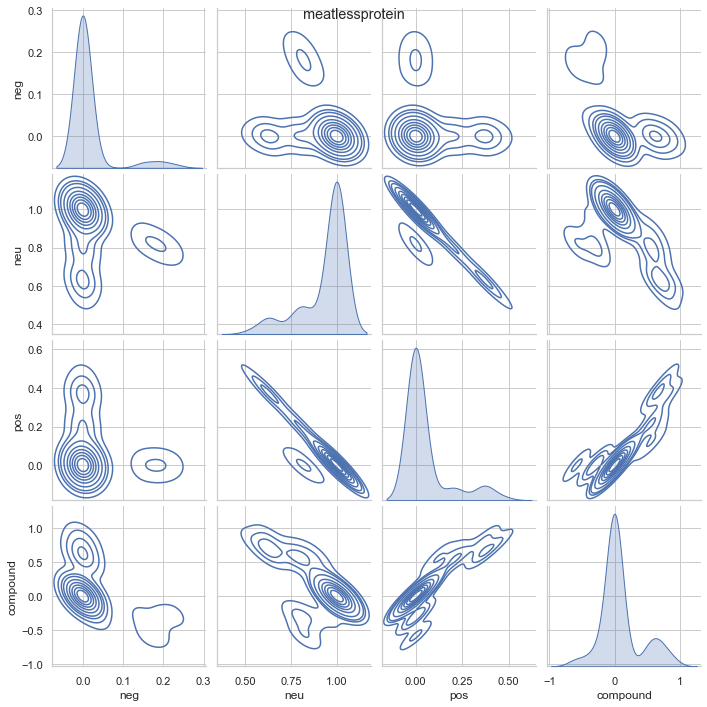

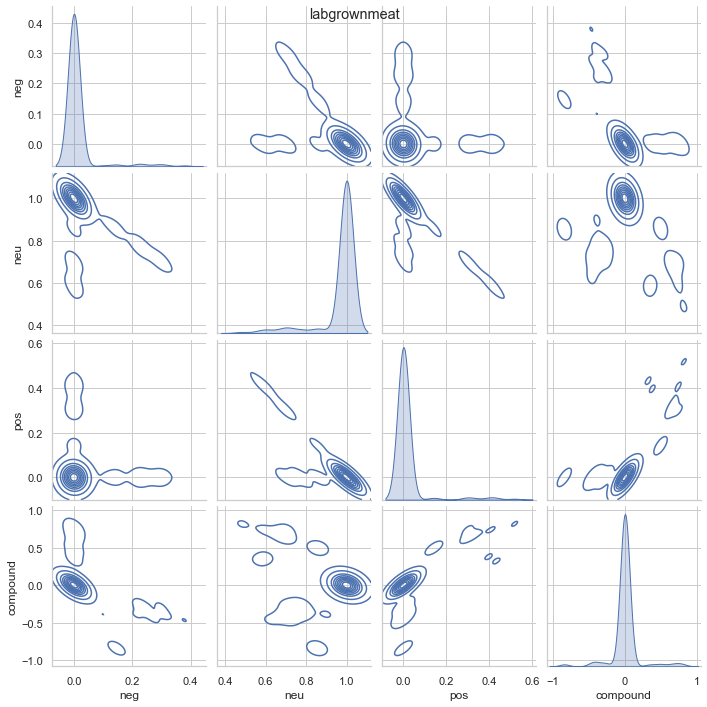

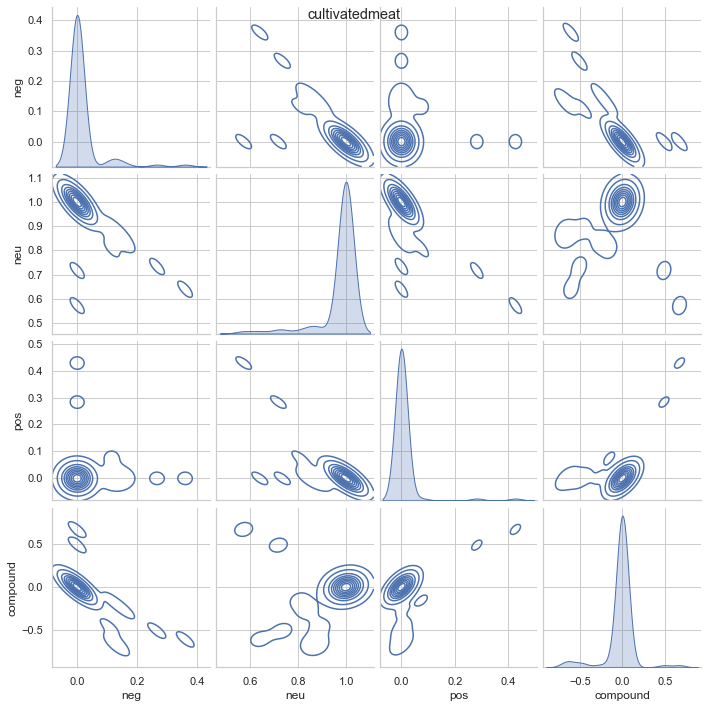

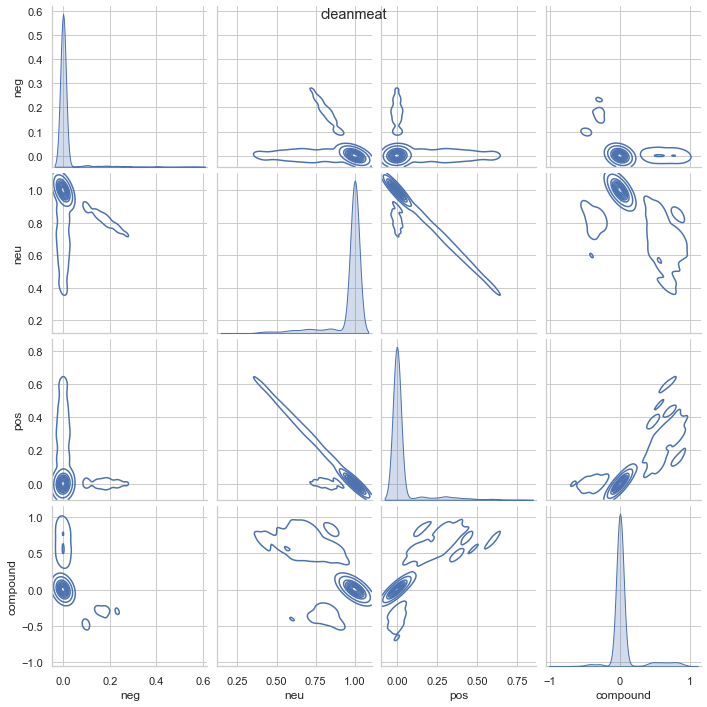

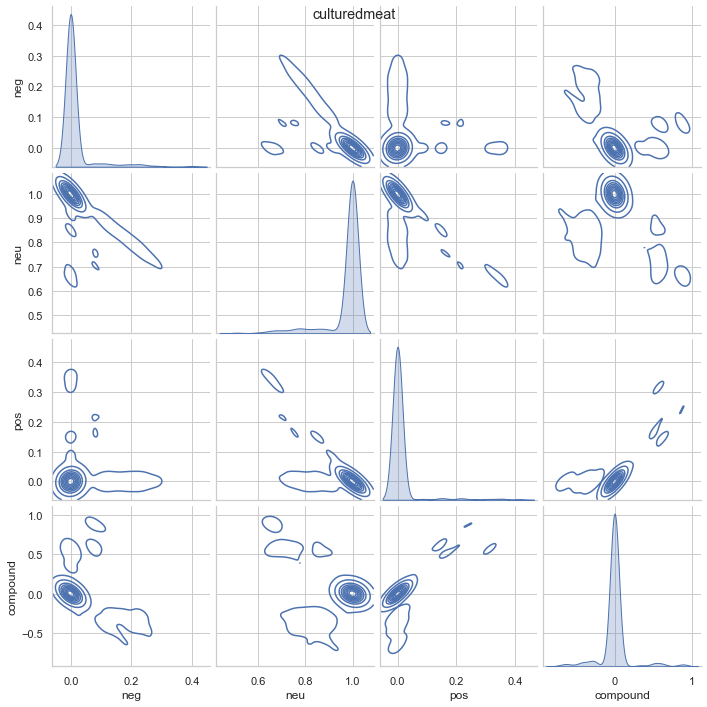

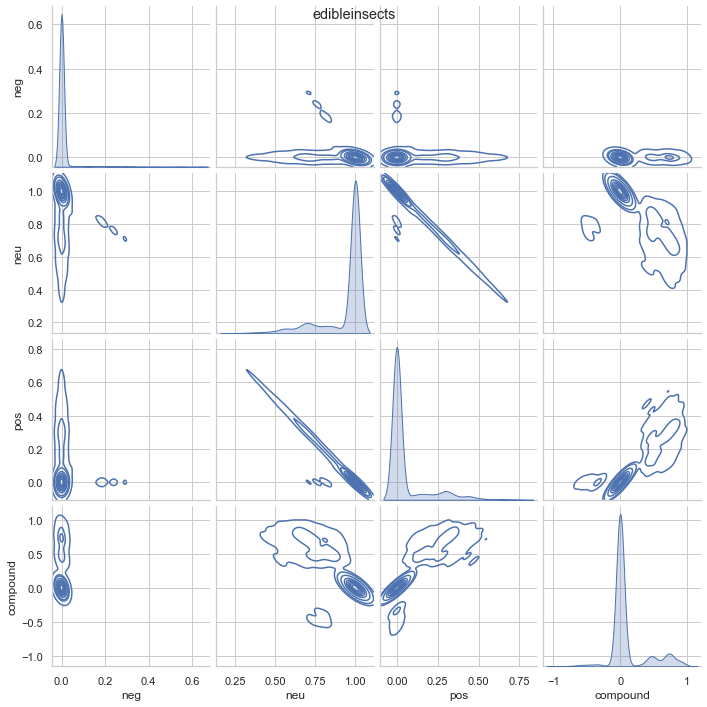

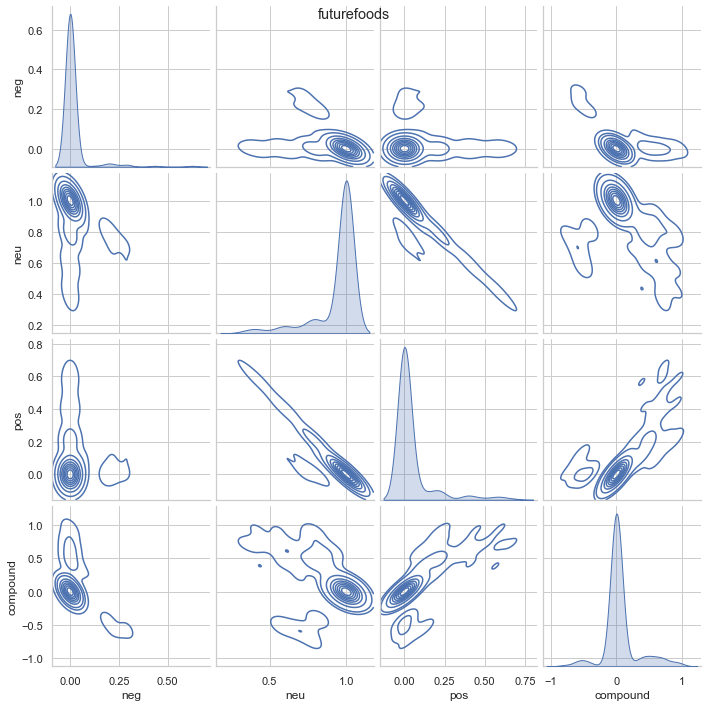

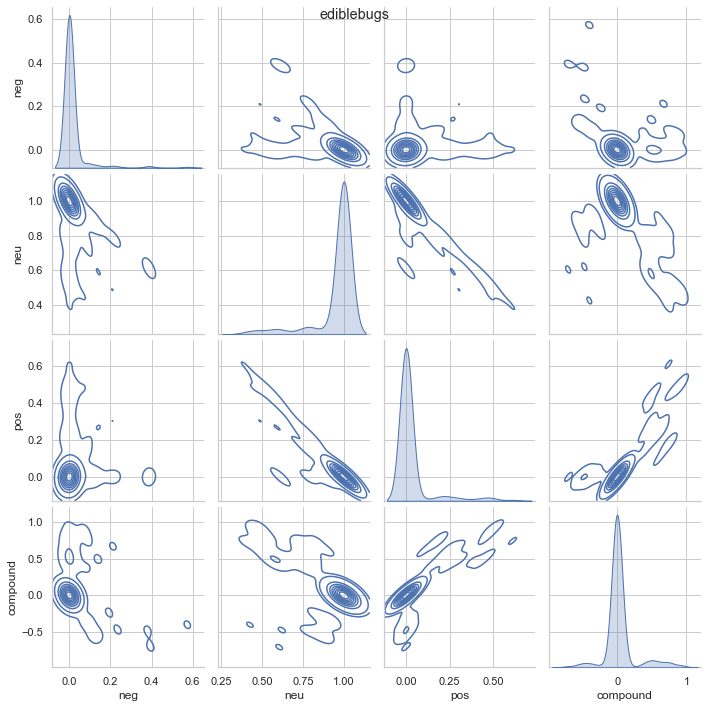

In [ ]:
## Querying each hashtag to create new dataframe

for tag in tag_unique:
    for x,y in df_senti_score.iteritems():
        if tag == x:
            print(tag)
            speci_df_senti_score = df_senti_score[df_senti_score[tag] == 1]
            
            g = sns.pairplot(speci_df_senti_score, x_vars=['neg','neu','pos','compound'], y_vars=['neg','neu','pos','compound'],kind="kde")
            g.fig.suptitle(tag)
            ##graph = sns.PairGrid(speci_df_senti_score, x_vars=['neg','neu','pos','compound'], y_vars=['neg','neu','pos','compound'])
            ##graph.map_upper(sns.histplot)
            ##graph.map_lower(sns.kdeplot, fill = True)
            ##graph.map_diag(sns.histplot, kde =True)


